# Stationary droplet verification case

Evolution of spurious currents for the stationary droplet when using the LENT method. 

The domain is $\Omega : [0,0,0] \times [1.6,1.6,1.6]$ with a spherical interface $\mathit{R} = 0.4$ centered at $[0.800000012,0.799999932,0.800000054]$,to avoid exact overlap with mesh points. The material properties are identical for the droplet and the ambient fluid with the density $\rho = 1$, the kinematic viscosity $\upsilon = [8.165e-2,2.582e-2,8.165e-3,0]$ and a surface tension coefficient of $\sigma = 1$. the values of $\upsilon$ are chosen such that the Laplace number $$ La = \frac{2\mathit{R}\sigma}{\rho\upsilon^2}$$ assumes $La = [120, 1200, 12000, \infty]$. We prescribe Dirichlet boundary conditions for the pressure $p = 0$ on $\partial\Omega$ and for the velocity $\nabla v\bullet n = 0$ on $\partial\Omega$. The initial conditions are $p(t_0) = 0$ and $v(t_0)=0$. Atime step of $\Delta t=0.5\Delta t_{cw}$ is chosen where $$ \Delta t_{cw} = \sqrt{\frac{\rho h^3}{\pi\sigma}}$$ is the time step limit dueto capillary waves.

**SAAMPLE: A Segregated Accuracy-driven Algorithm for Multiphase Pressure-Linked Equations,
Tobias Tolle, Dieter Bothe, Tomislav Maric** __[arXiv](https://arxiv.org/abs/2001.09775v1)__

In [1]:
#import notebookPlotting 
#import subprocess

import pandas as pd
import dataAgglomeration as datglom 
import sys
sys.path.append('/work/projects/project01204/lent/cases/scripts/modules')
from nbplt_Stat_output import plot_dframe
from matplotlib import rcParams
import matplotlib.pyplot as plt

idx = pd.IndexSlice

import os
if (not(os.path.exists('figures'))):
    os.mkdir('figures')



def plot_comparison(old_df, new_df, case_path):
    import matplotlib.pyplot as plt
    rcParams['figure.dpi'] = 200
    rcParams['font.size'] = 8
    import warnings

    def plot_format(resolution,case_path=''):
        """Plots the L_inf(v) error and compares the old_df with new_df for all Laplace numbers for a 
        single mesh resolution."""

        # FIXME: We have to store the Laplace numbers and all other dimensionless numbers in the 
        #        secondary data, to prevent the need for listing them explicitly or re-calculating them.
        laplace_numbers = [120, 1200, 12000, "Inf"]
        viscosities =sorted(list(set(old_df["nu_droplet"])), reverse=True) 

        N = int(len(viscosities)**0.5)

        fig, ax = plt.subplots(2,2)

        for i,viscosity in enumerate(viscosities): 
            new_state = new_df.loc[idx[[resolution],[viscosity],:]]
            old_state = old_df.loc[(old_df['resolution']==resolution)&(old_df['nu_droplet']==viscosity)]
            row = int(i / N)
            col = int(i % N)
            ax[row,col].plot(new_state['time'], new_state['Linf velocity error'], label='new state')
            ax[row,col].plot(old_state['time'], old_state['Linf velocity error'], label='old state')
            ax[row,col].legend(loc='upper left')
            ax[row,col].set_title(r"$La\ =\ %s$" % laplace_numbers[i])
            ax[row,col].set_yscale('log')
            ax[row,col].set_ylabel('$L_\infty(\mathbf{v})$')
            ax[row,col].set_xlabel('Time $s$')
        
        
        fig.tight_layout()      
        fig.subplots_adjust(top=0.88)
        fig.suptitle("Stationary droplet, $N_c$ = %s" % resolution)

# -------------------unsave/save figures--------------------
#         split_n= case_path.split('/')
#         fig_name='Stat_popinet2009_comparsion_N%s' % resolution+'_'+split_n[1]+'_'+split_n[2]+'_'+split_n[3]
#         figures_path = os.environ['LENT_DENSITY_RATIO']
#         plt.savefig(os.path.join(figures_path,"%s.pdf"% fig_name))
#         plt.savefig('figures/%s.pdf'% fig_name)



    old_resolutions = list(set(old_df["resolution"]))
    old_resolutions.sort()
    new_resolutions = list(set(new_df.index.get_level_values("resolution")))
    new_resolutions.sort()
    resolutions = old_resolutions


    if (old_resolutions != new_resolutions): 
        print("Resolutions available in the old data set = ", old_resolutions)
        print("Resolutions available in the new data set = ", new_resolutions)    
        warnings.warn("Old and new mesh resolutions are not equal, comparing the shorter resolution list!")

        if (len(old_resolutions) > len(new_resolutions)):
            resolutions = new_resolutions

    for resolution in resolutions:
        plot_format(resolution, case_path=case_path)
        

In [2]:
def popinet2009_plot(case_path):
    rcParams["figure.dpi"] = 200
    #rcParams['font.size'] = 8
    study_name = "popinet2009.parameter"
    case_0_path = case_path + study_name + "_00000_template_copy_hexrefined"
    popinet2009_agglom  = datglom.data_agglomerator(study_name, 
                                                  case_0_path,
                                                  "stationaryDropletResults.csv") 
 
    popinet2009_df = popinet2009_agglom.study_dataframe() 

    plotDict={"x" : "time", "xsymb" : r"$t$", 
          "y" : "Linf velocity error", 
          "ysymb" : r"$L_\infty(\mathbf{v})$",
          "resolution" : r"$N$", "rho_droplet" : r"$\rho_1$", 
          "nu_droplet" : r"$\nu_1$"};

    plot_dframe(popinet2009_df, popinet2009_agglom,case_path,
            title="All density ratios", 
            plotDict=plotDict)


In [3]:
def popinet2009_comparsion(case_path):
    old_state_df = pd.read_csv('saamplePaperConfig_stationaryDroplet_popinet2009.csv', header = 1 )
    
    rcParams["figure.dpi"] = 200
    popinet_2009_agglom  = datglom.data_agglomerator("popinet2009.parameter", 
                                                  "%s/popinet2009.parameter_00000_template_copy_hexrefined"% case_path,
                                                  "stationaryDropletResults.csv") 

    popinet_2009_df = popinet_2009_agglom.study_dataframe() 
    new_df=popinet_2009_df.loc[idx[[16,64],:,[1],:]]
    plot_comparison(old_state_df, new_df, case_path)


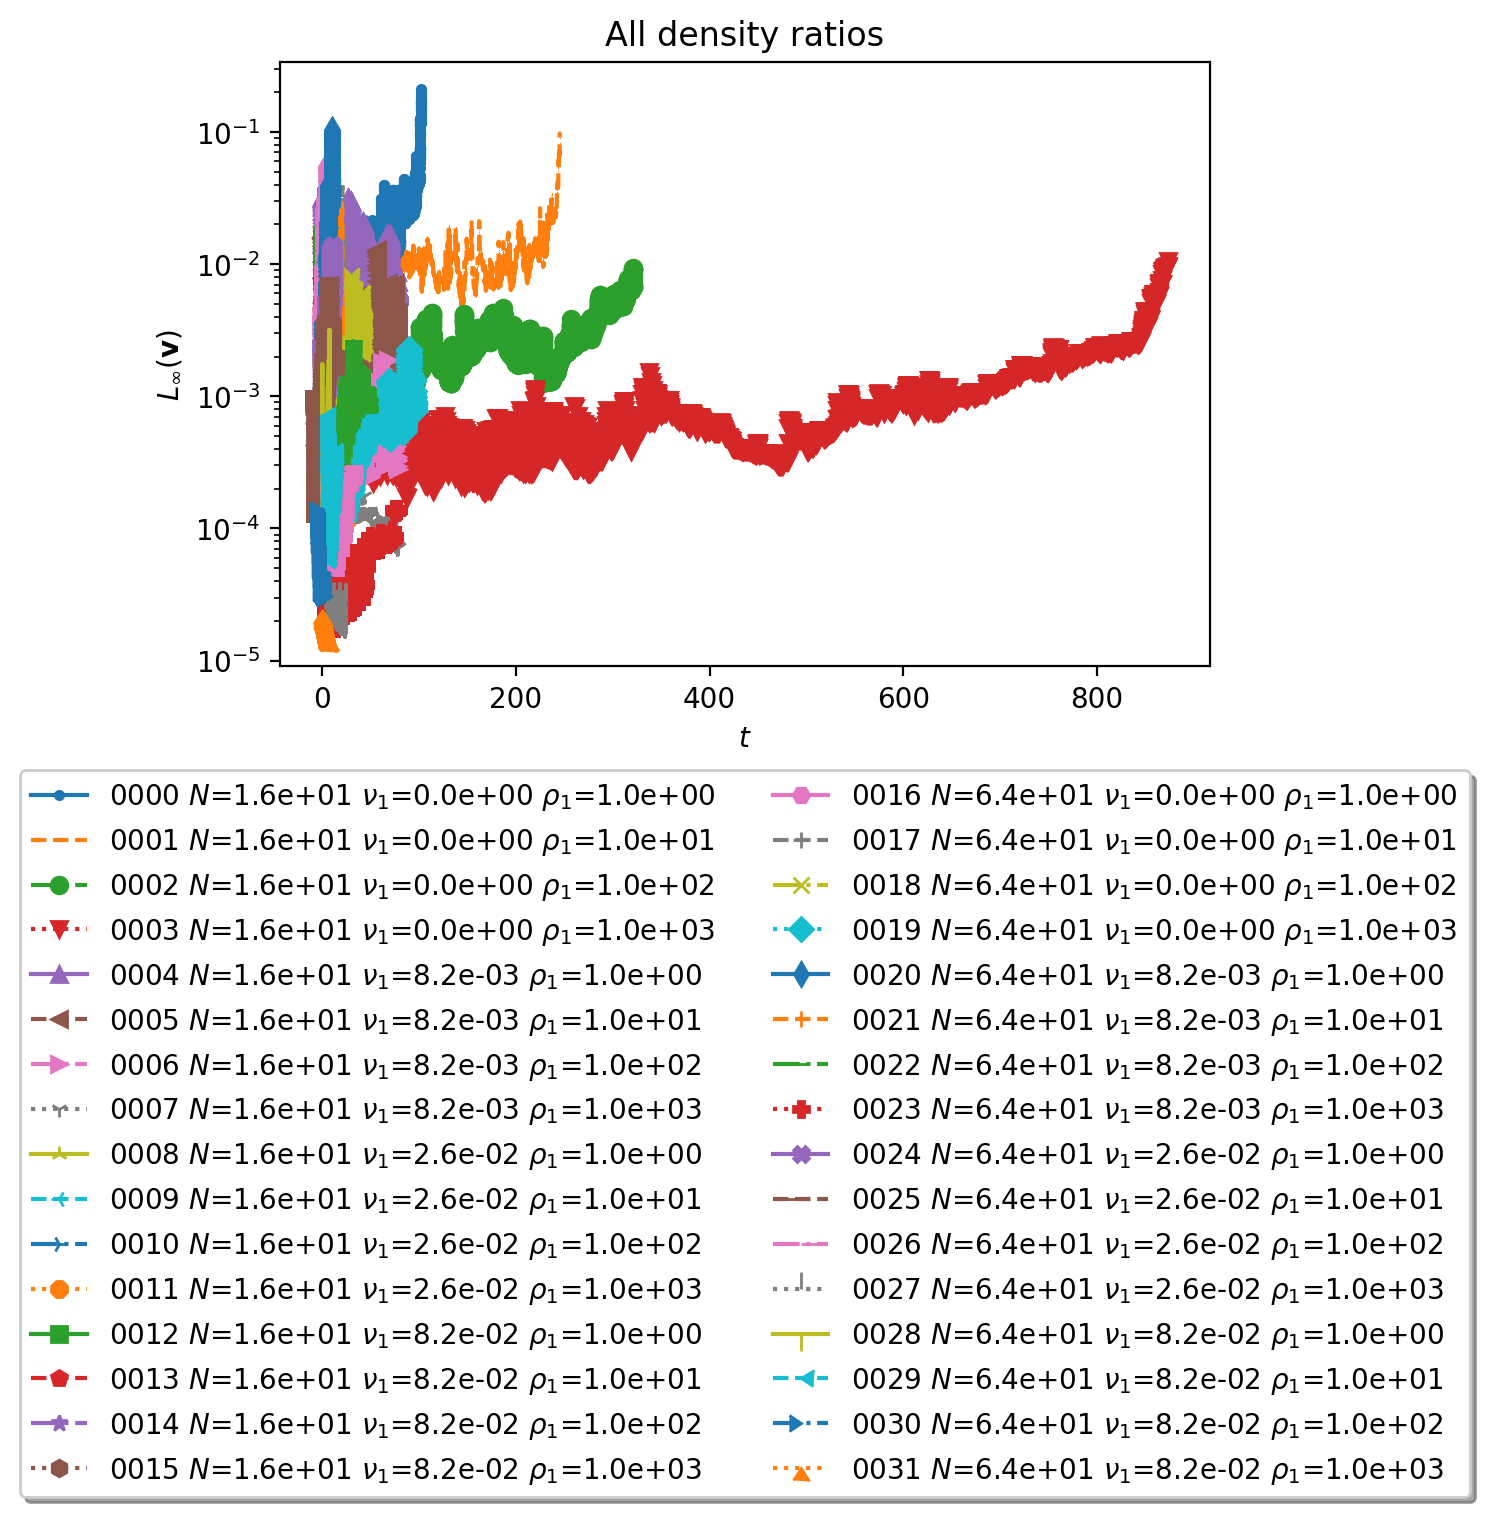

In [4]:
popinet2009_plot("variableDensityRatio/withRhoEquation/withMomentumPredictor/limitedLinearV1/")

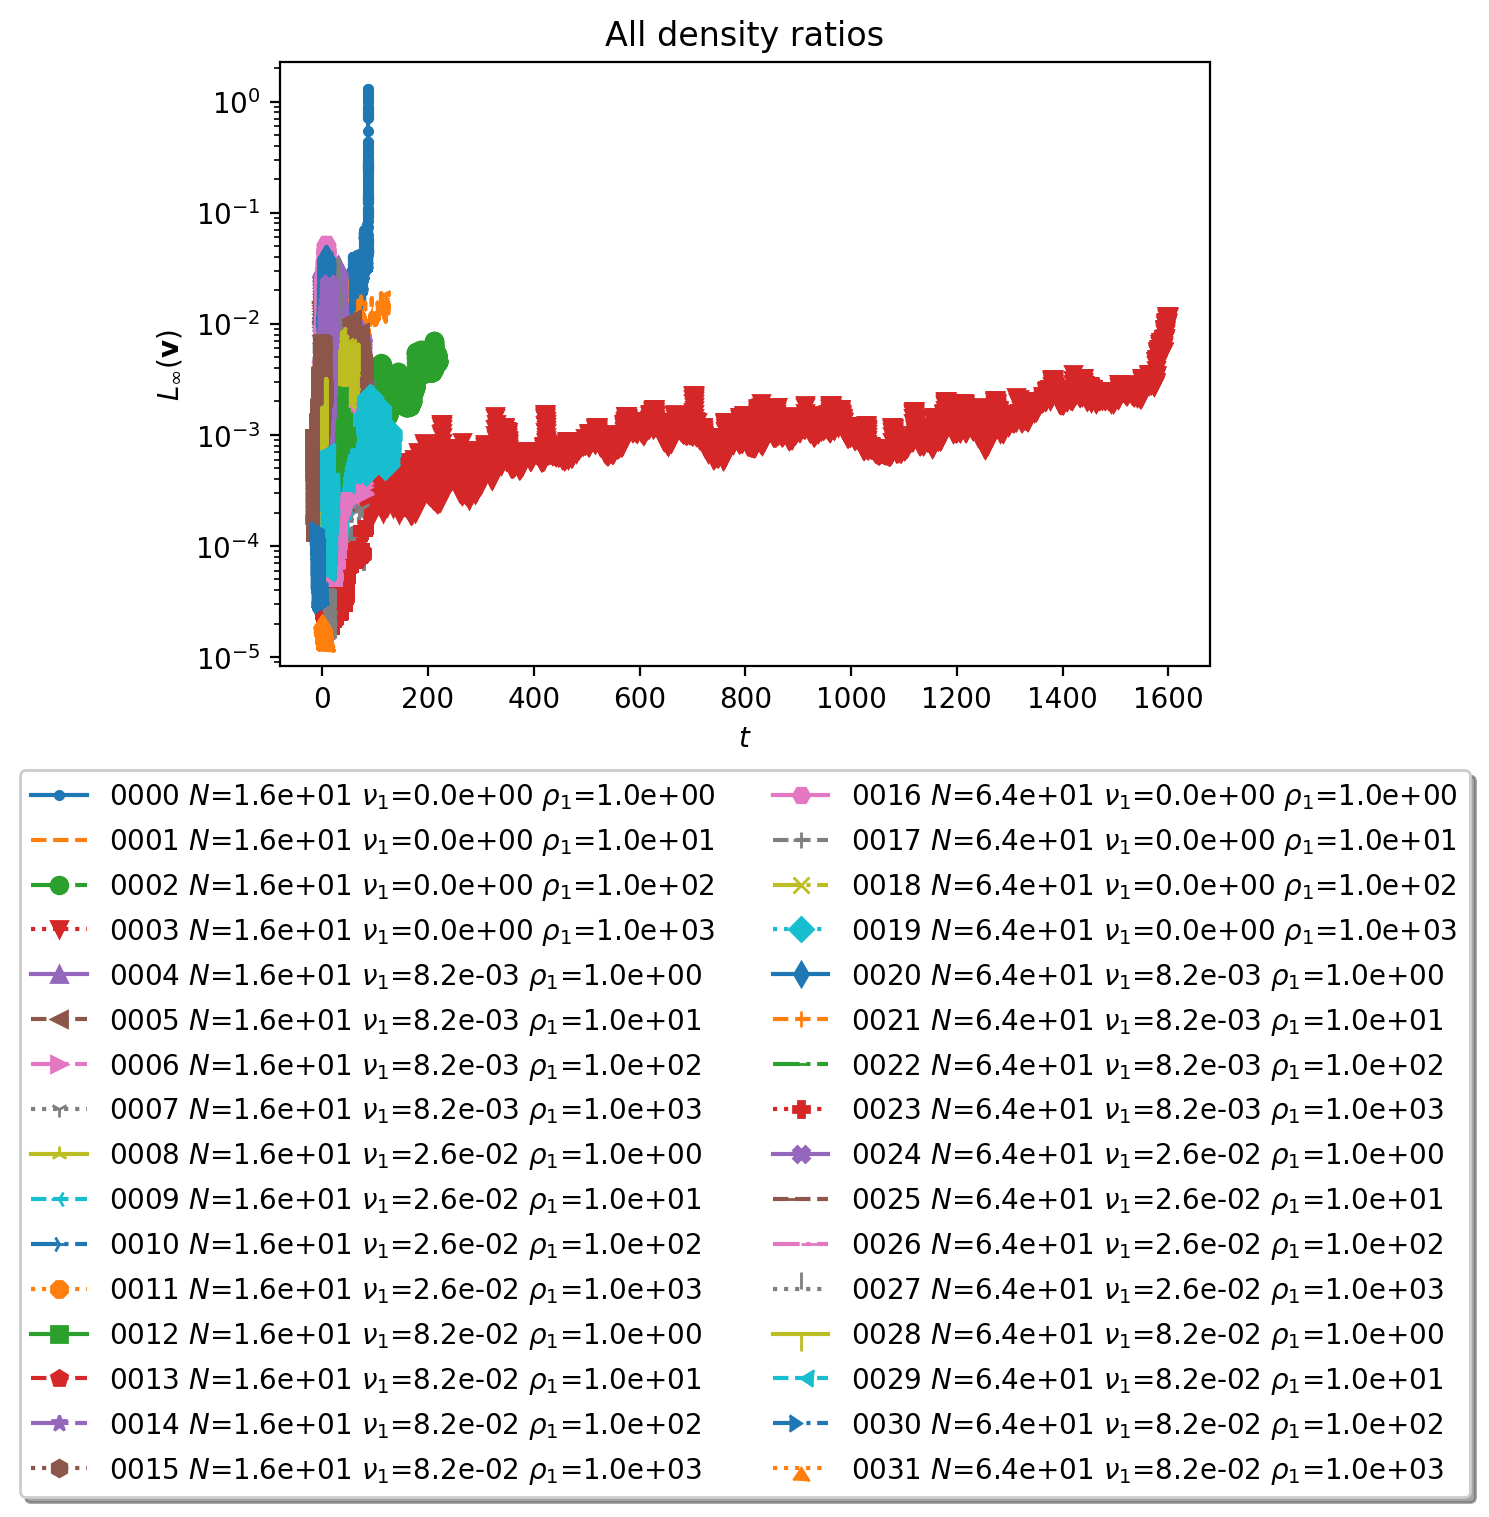

In [5]:
popinet2009_plot("variableDensityRatio/noRhoEquation/withMomentumPredictor/limitedLinearV1/")

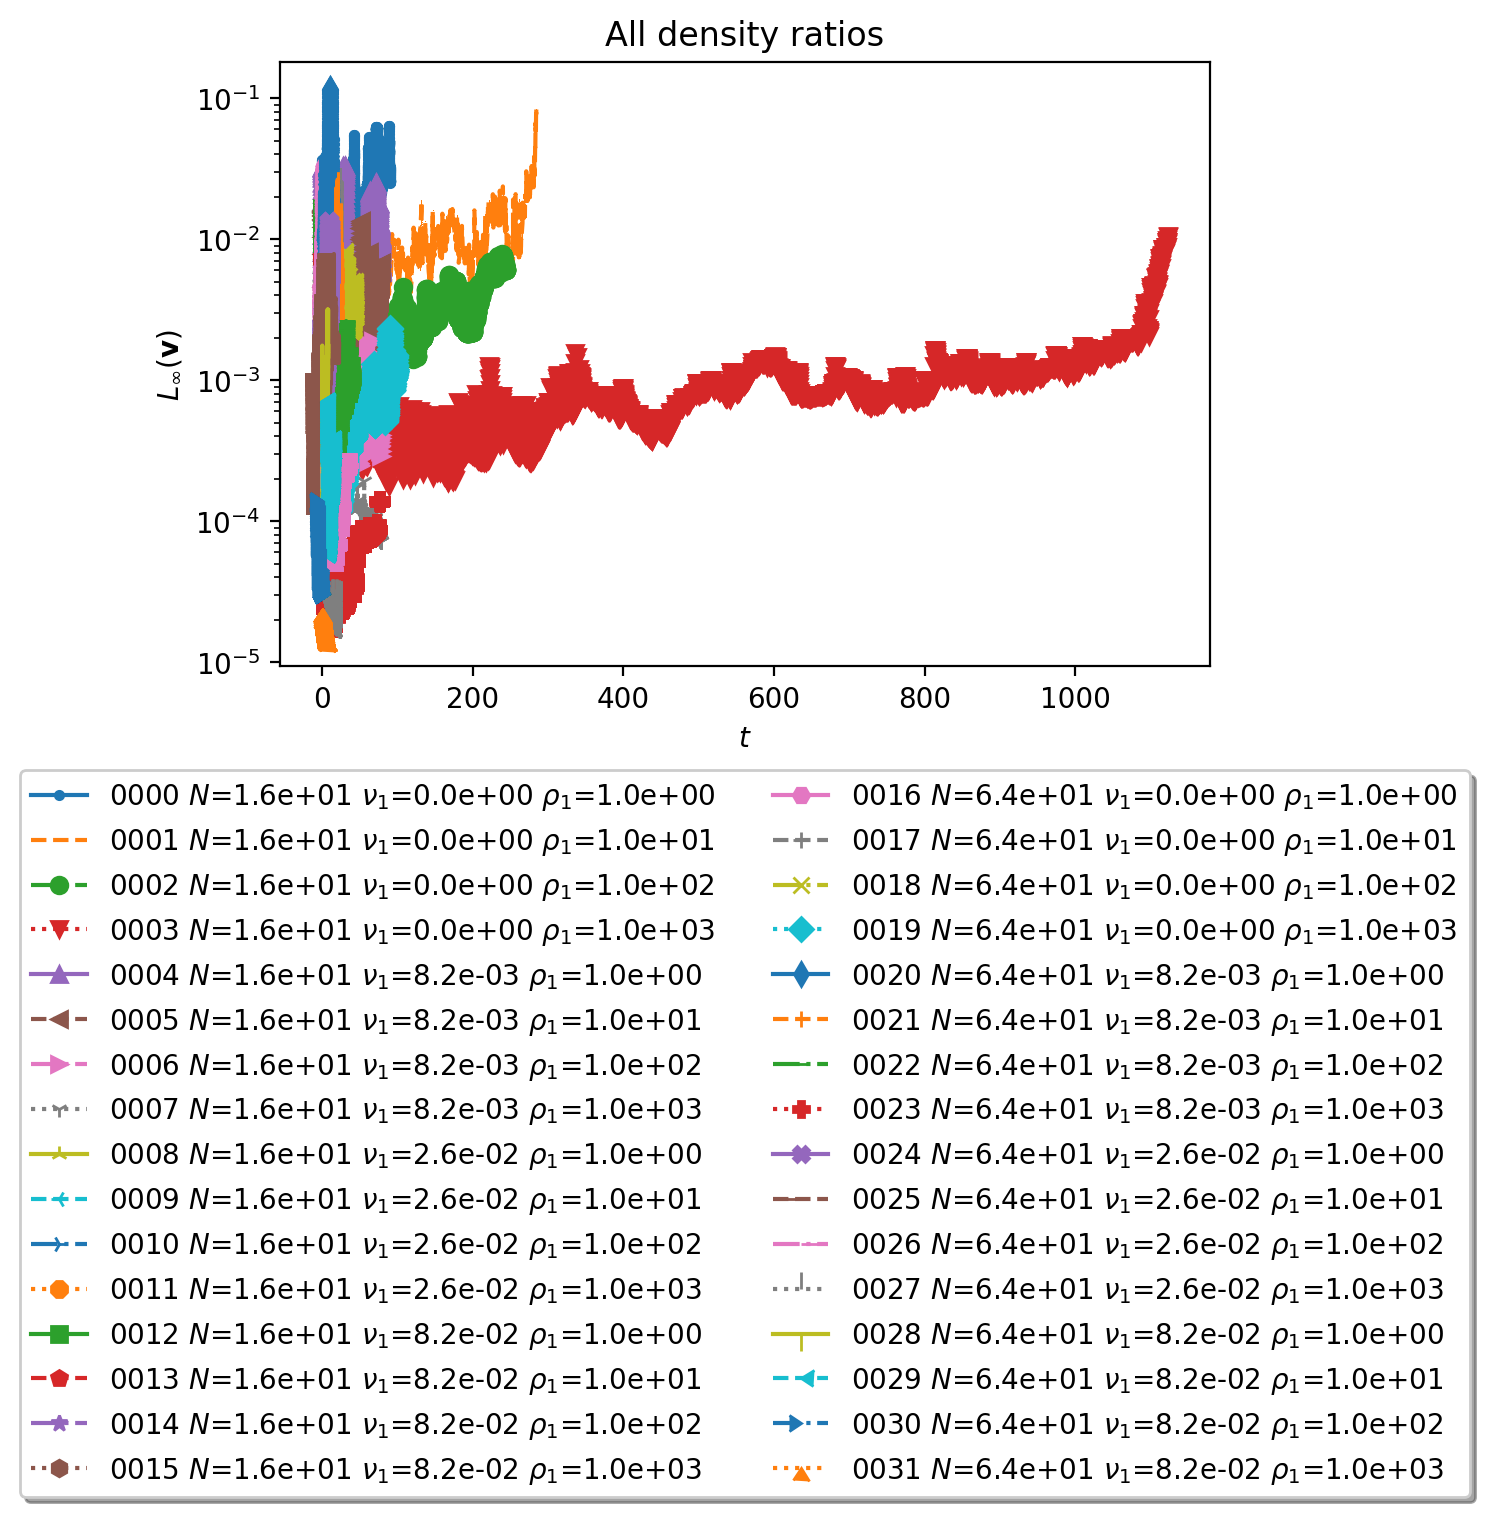

In [6]:
popinet2009_plot("variableDensityRatio/withRhoEquation/withMomentumPredictor/limitedLinearV0.5/")

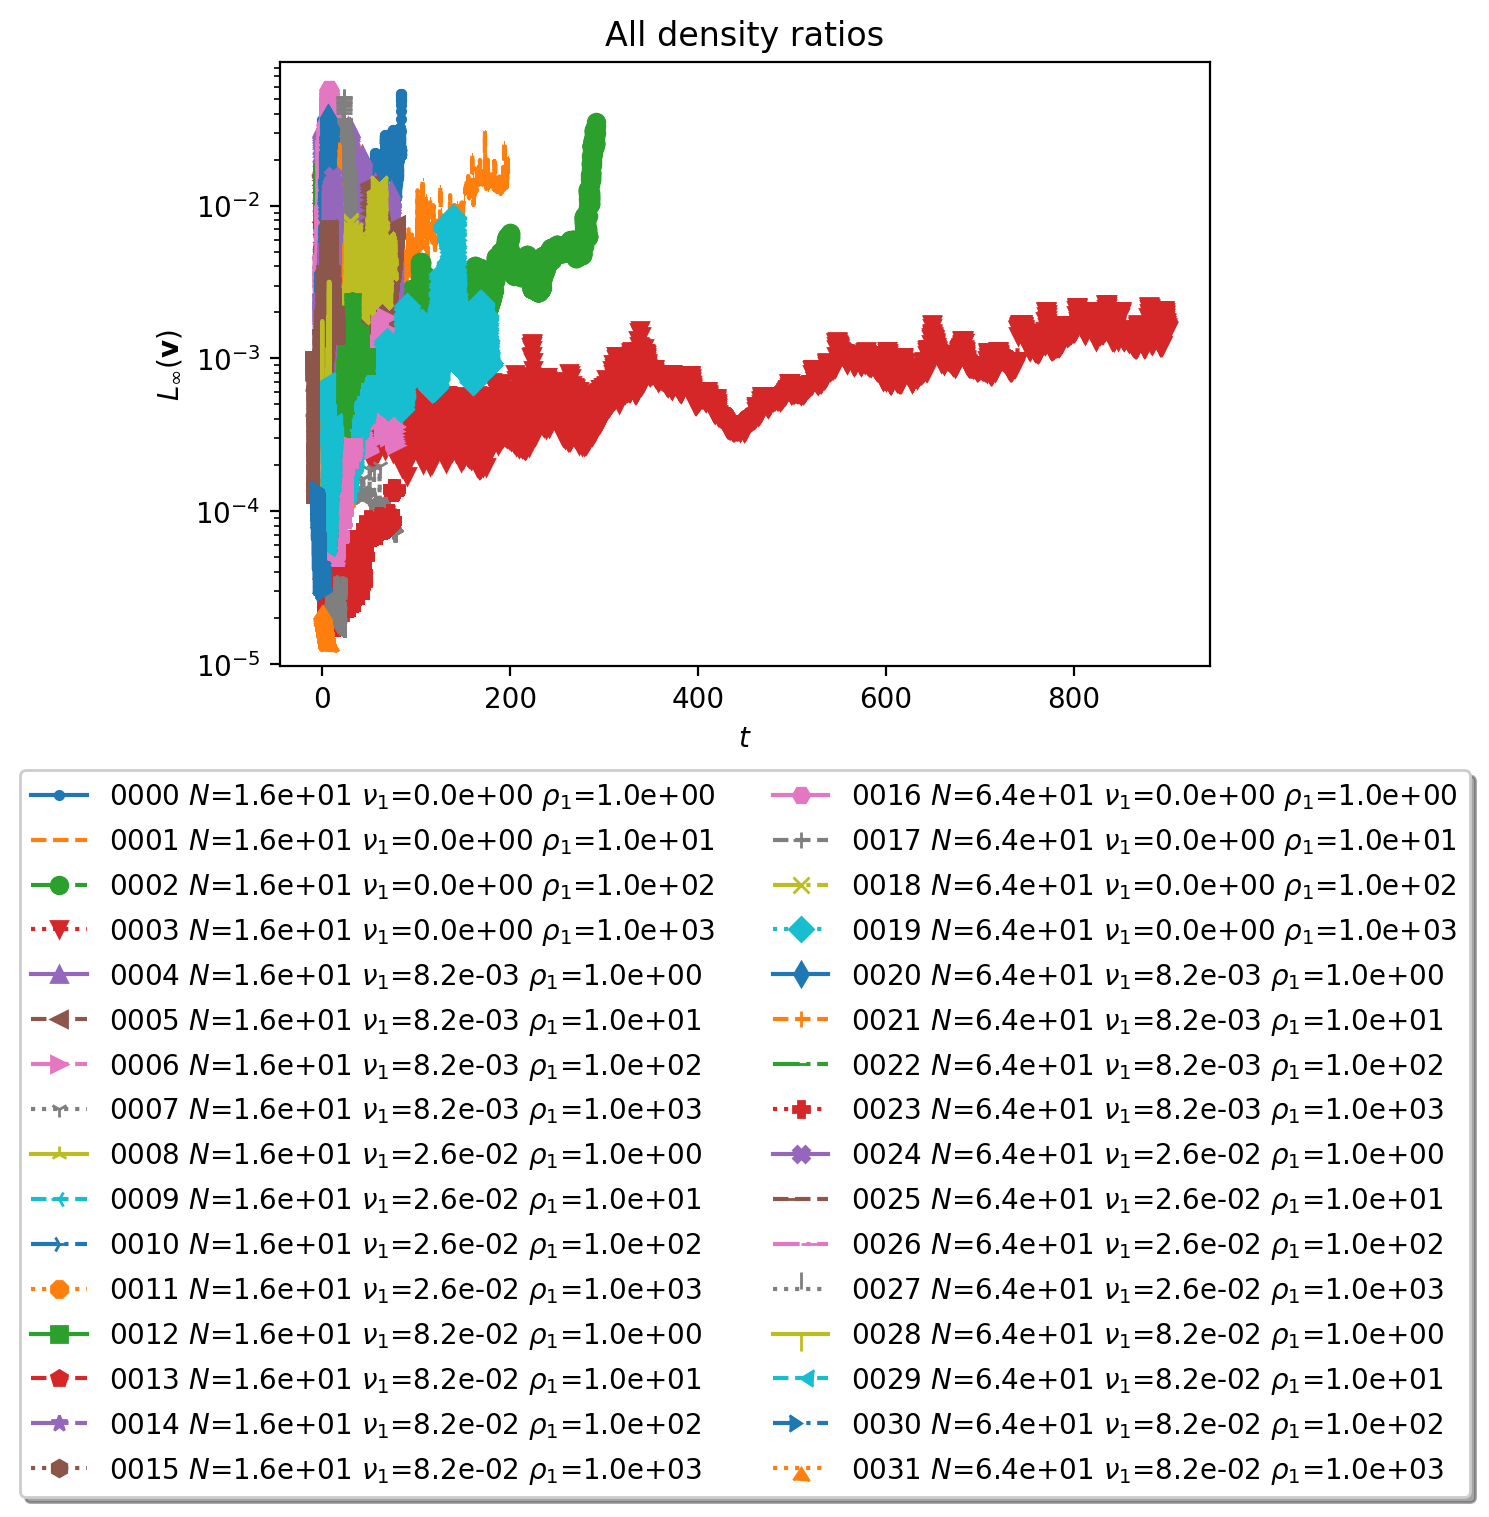

In [7]:
popinet2009_plot("variableDensityRatio/noRhoEquation/withMomentumPredictor/limitedLinearV0.5/")

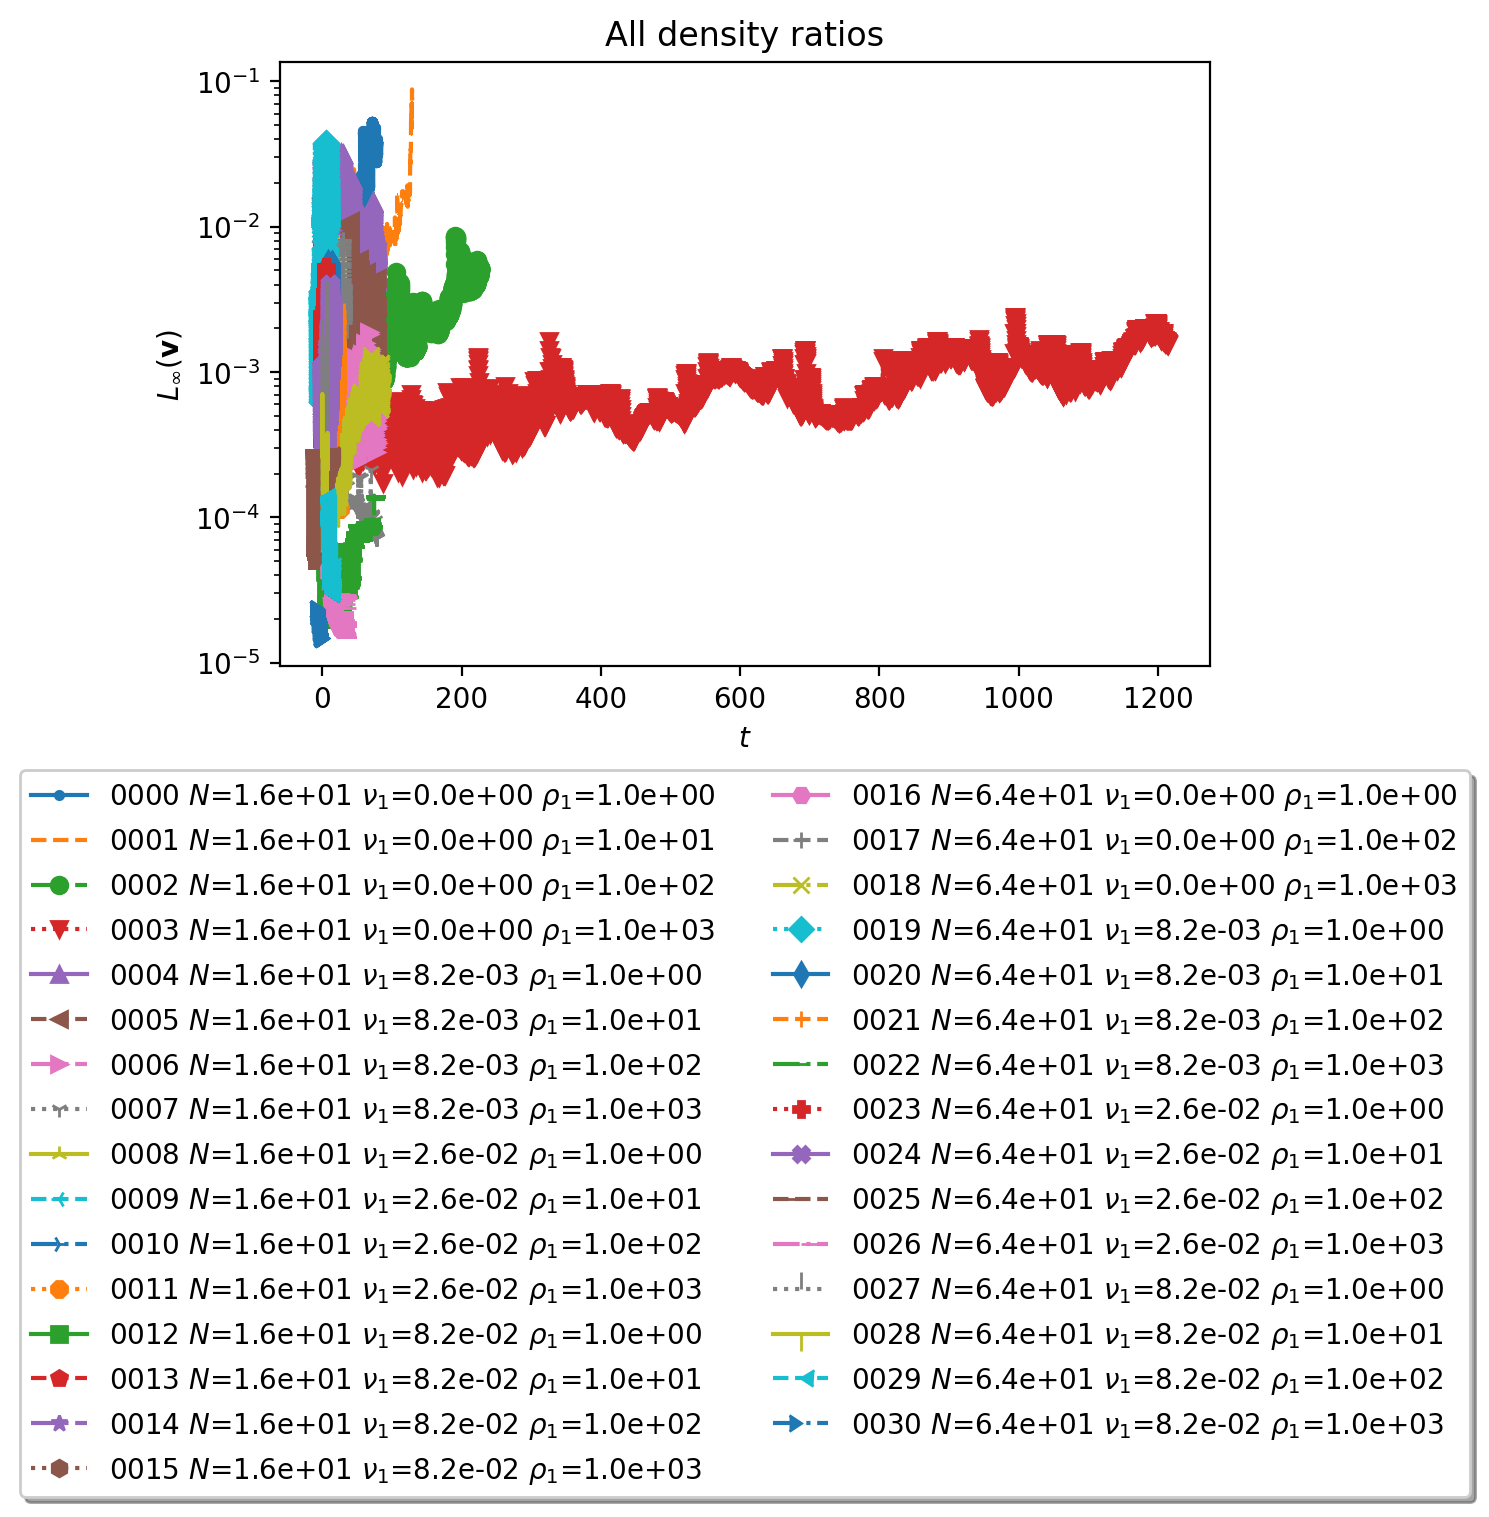

In [8]:
popinet2009_plot("variableDensityRatio/withRhoEquation/withMomentumPredictor/limitedLinearV0/")

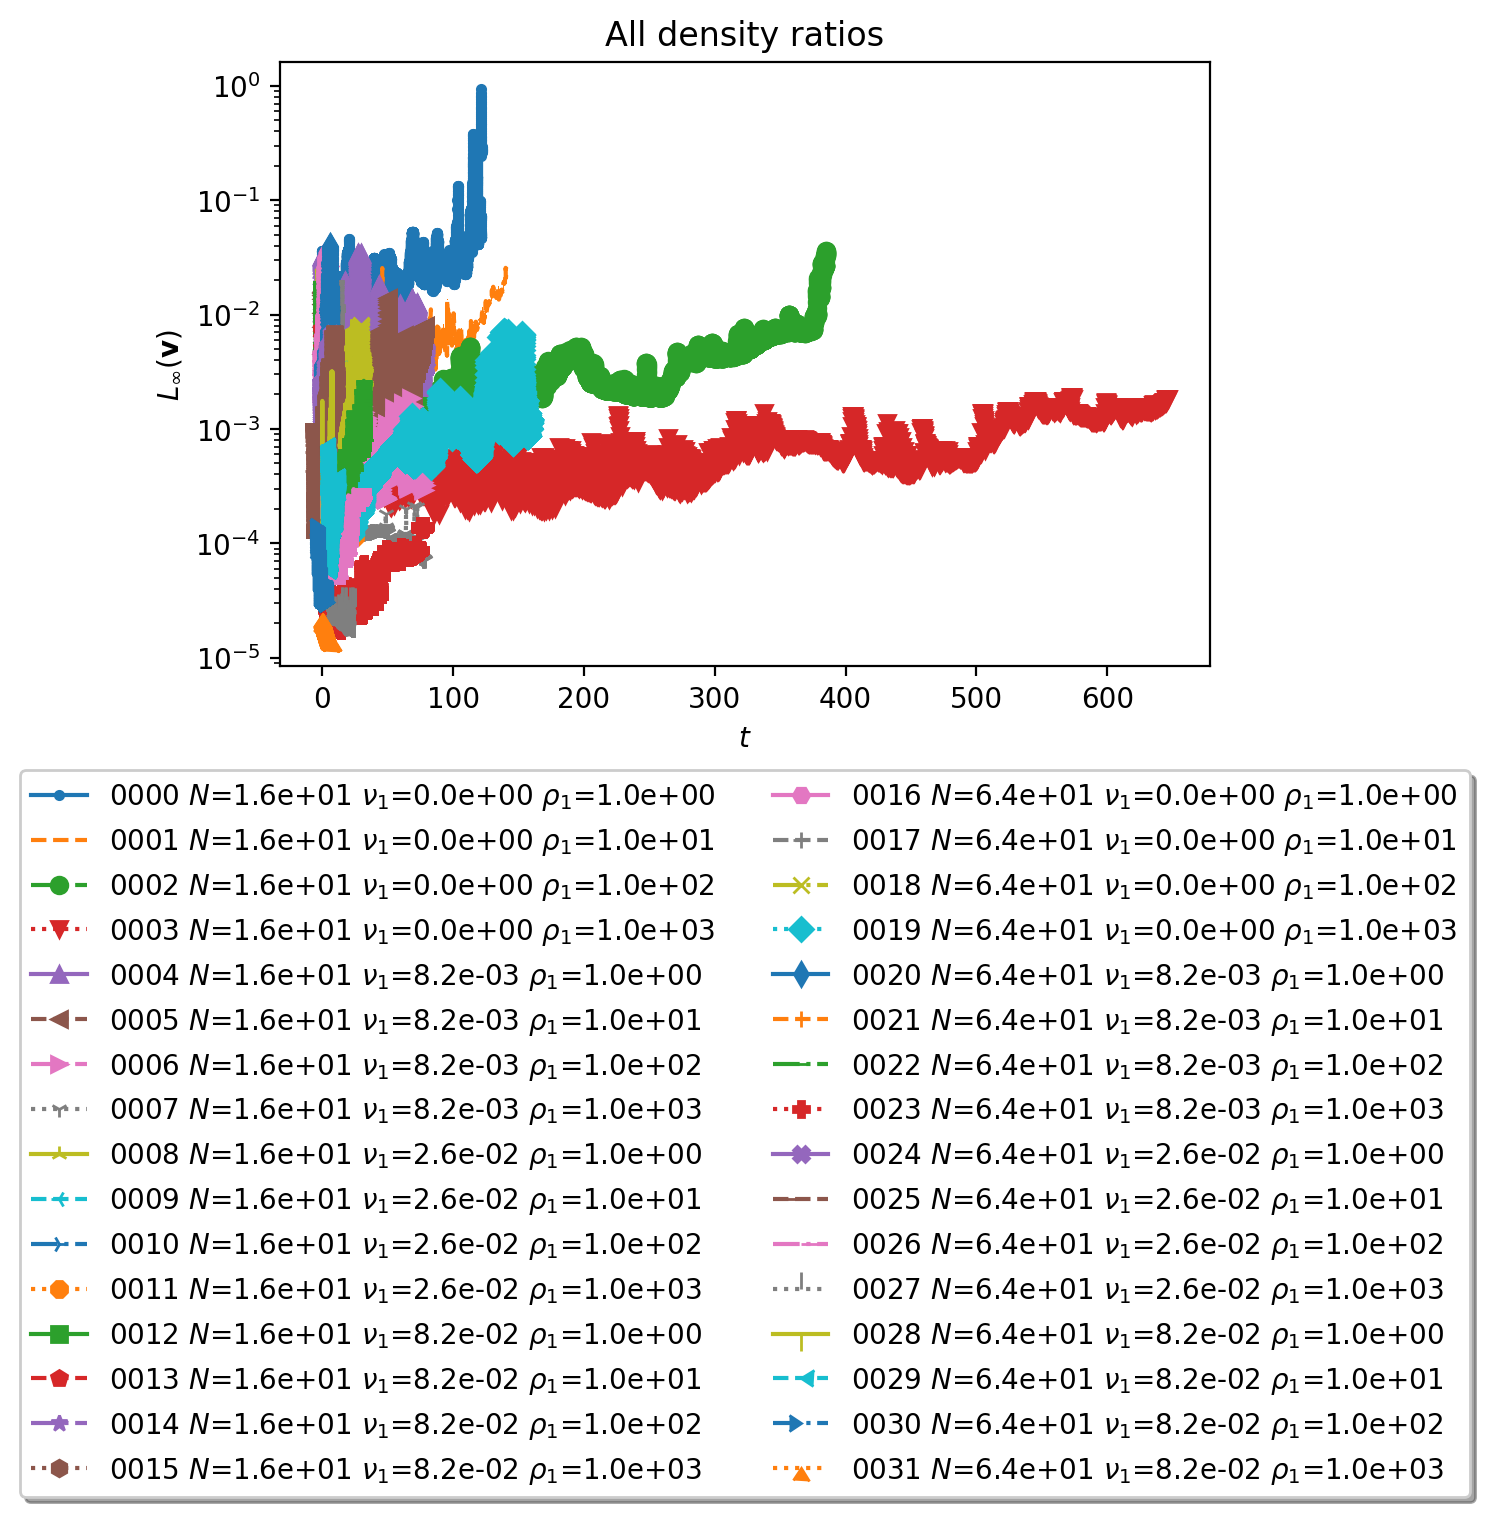

In [9]:
popinet2009_plot("variableDensityRatio/noRhoEquation/withMomentumPredictor/limitedLinearV0/")

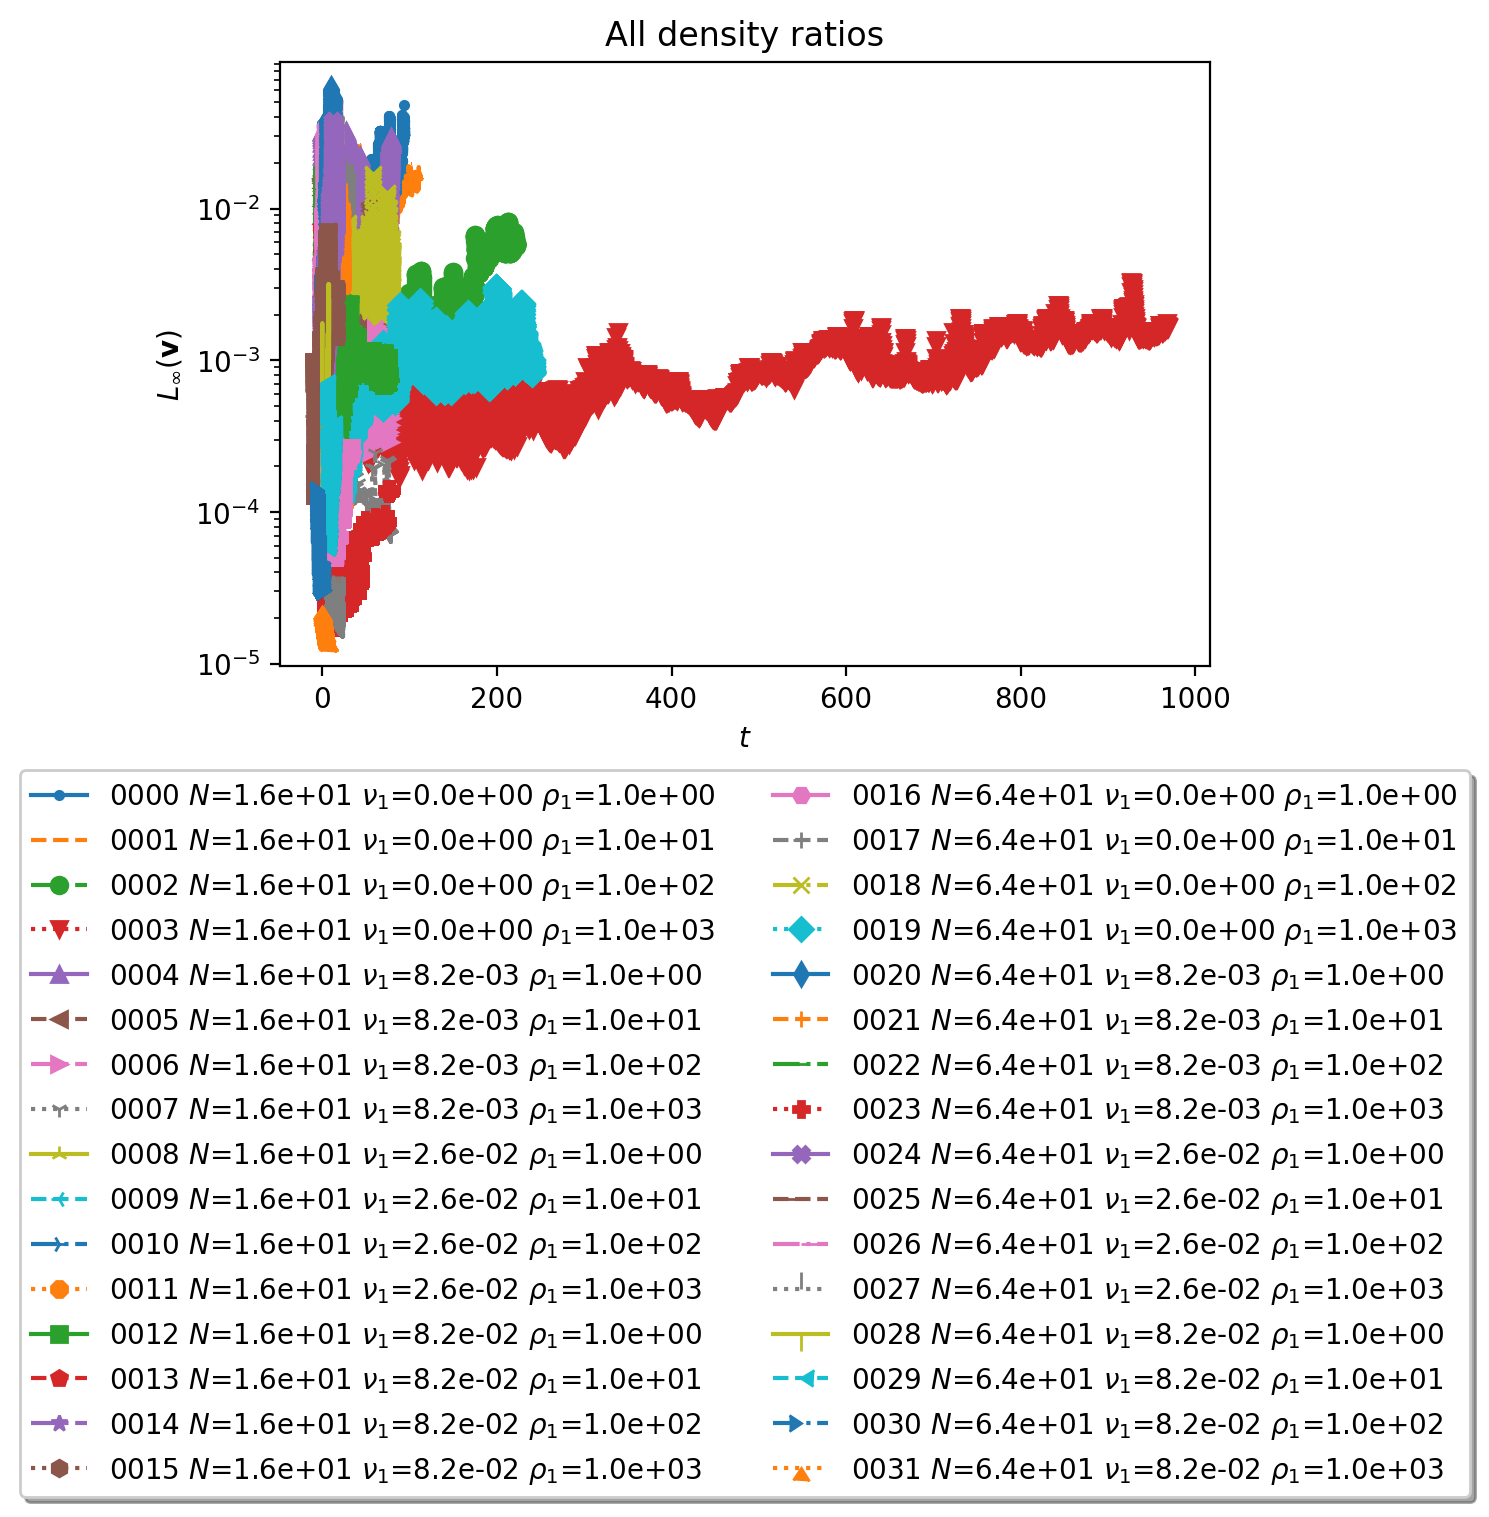

In [10]:
popinet2009_plot("variableDensityRatio/withRhoEquation/noMomentumPredictor/limitedLinearV1/")

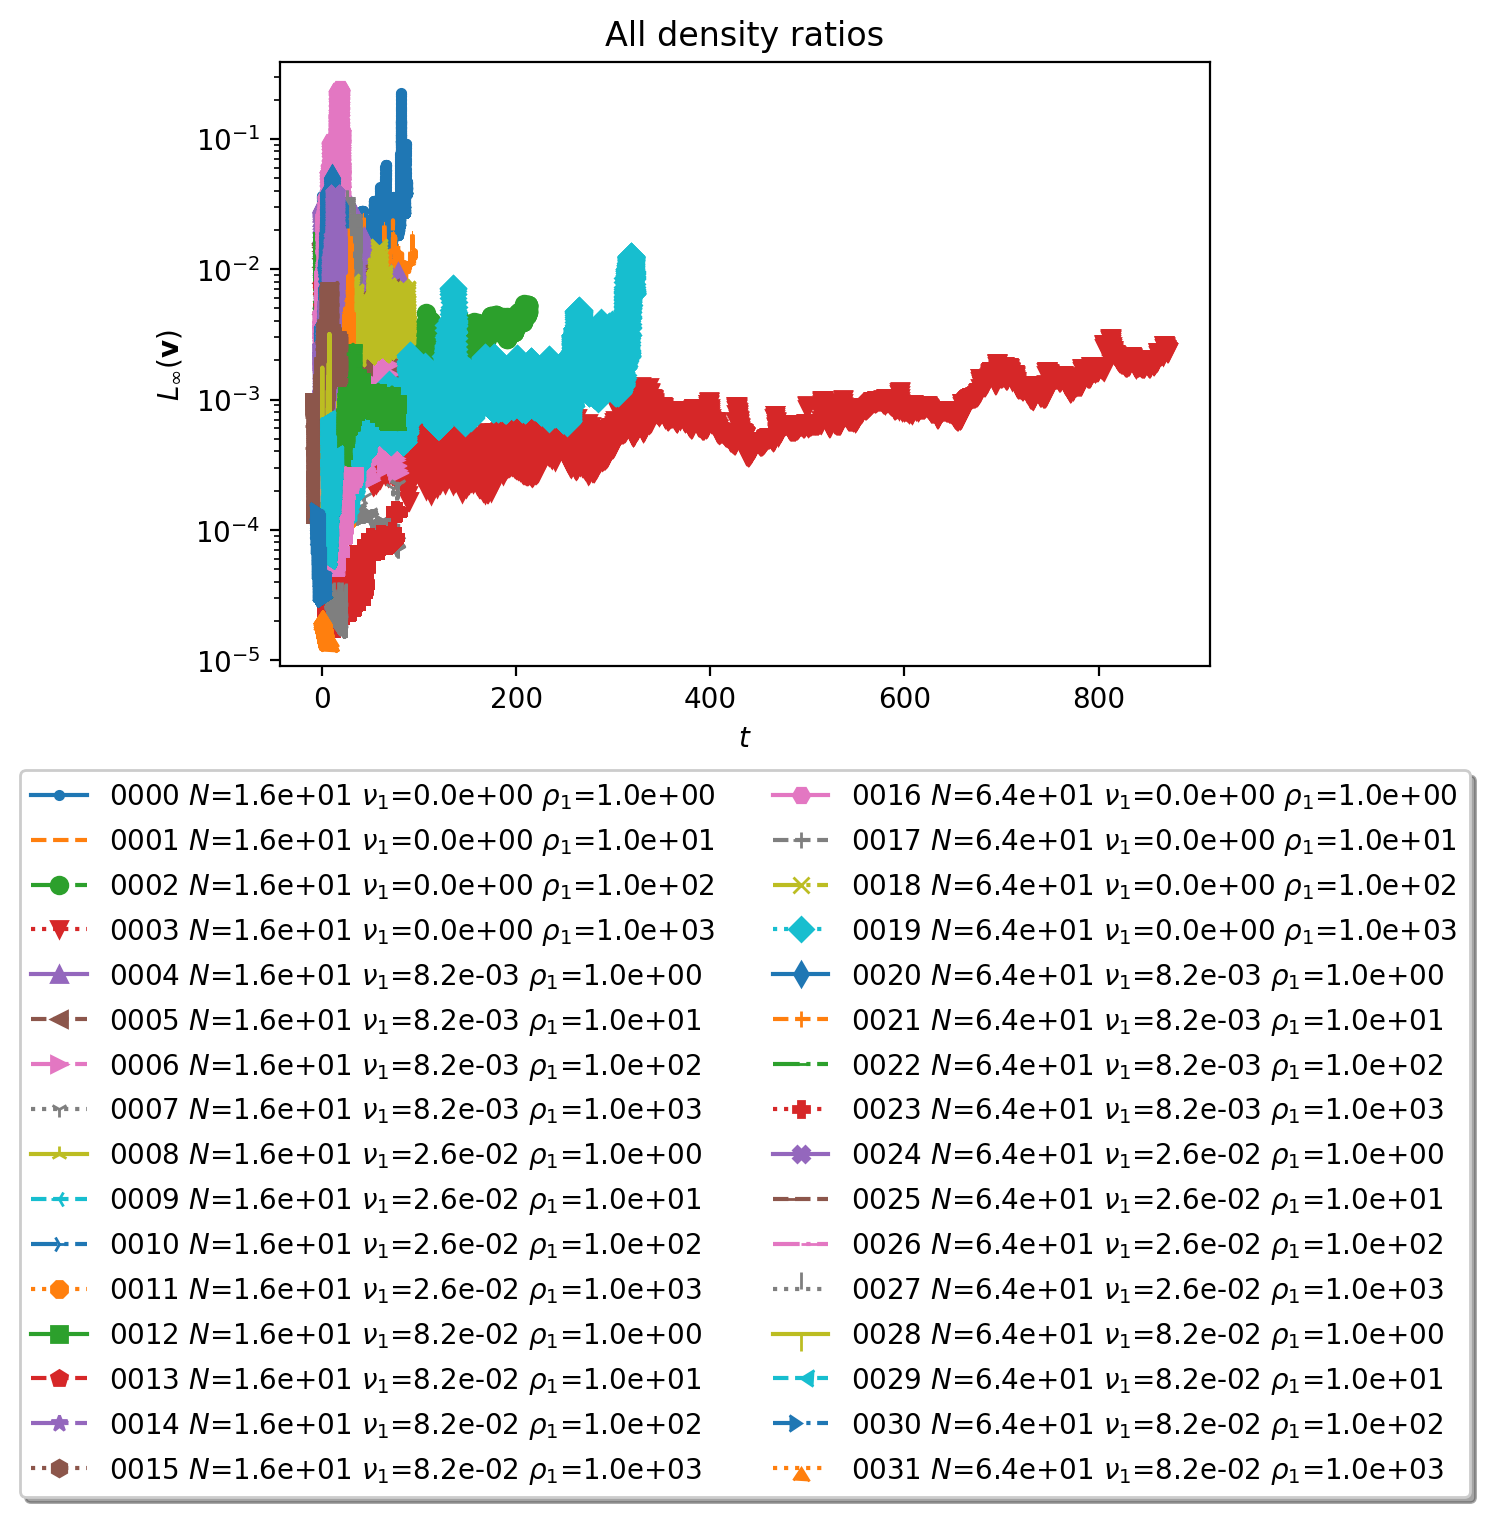

In [11]:
popinet2009_plot("variableDensityRatio/noRhoEquation/noMomentumPredictor/limitedLinearV1/")

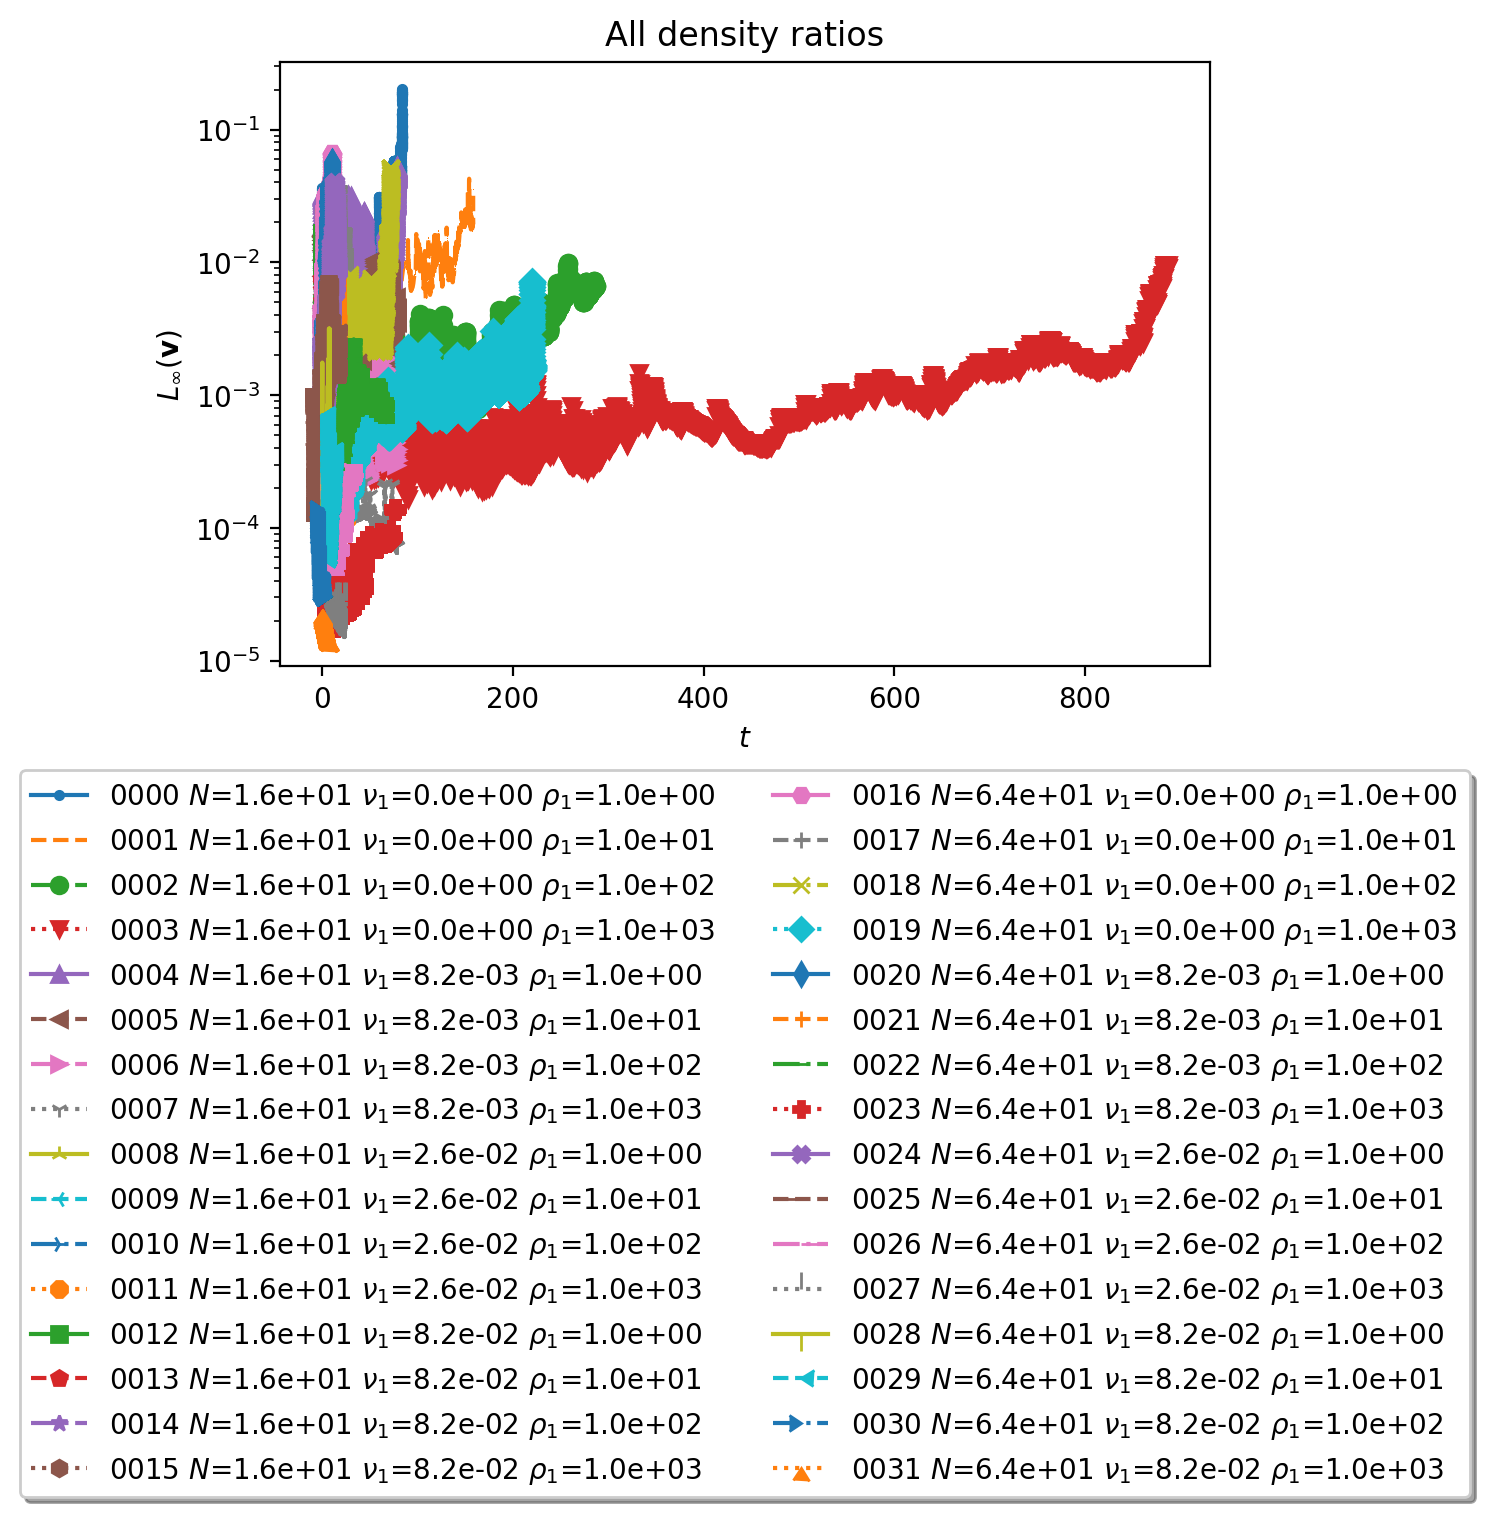

In [12]:
popinet2009_plot("variableDensityRatio/withRhoEquation/noMomentumPredictor/limitedLinearV0.5/")

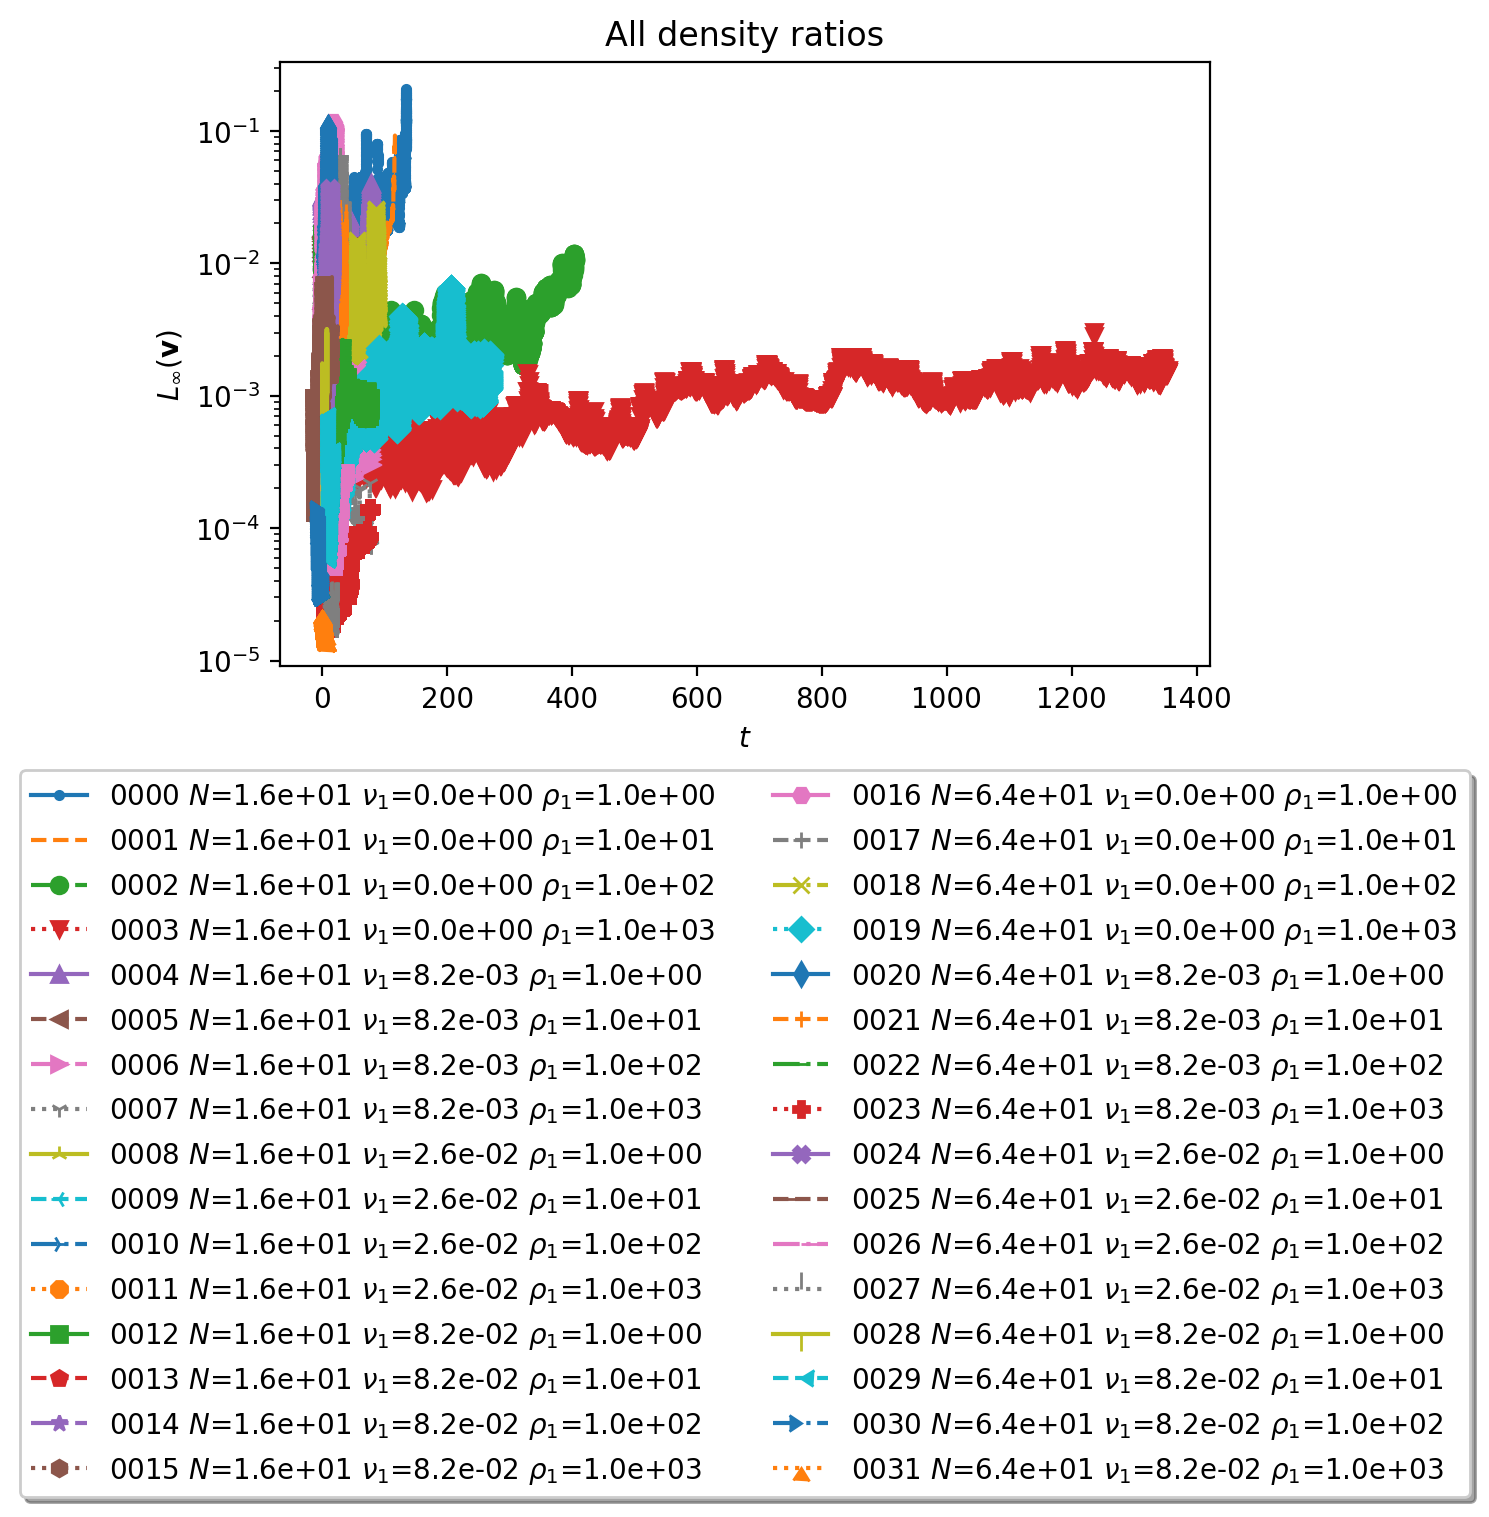

In [13]:
popinet2009_plot("variableDensityRatio/noRhoEquation/noMomentumPredictor/limitedLinearV0.5/")

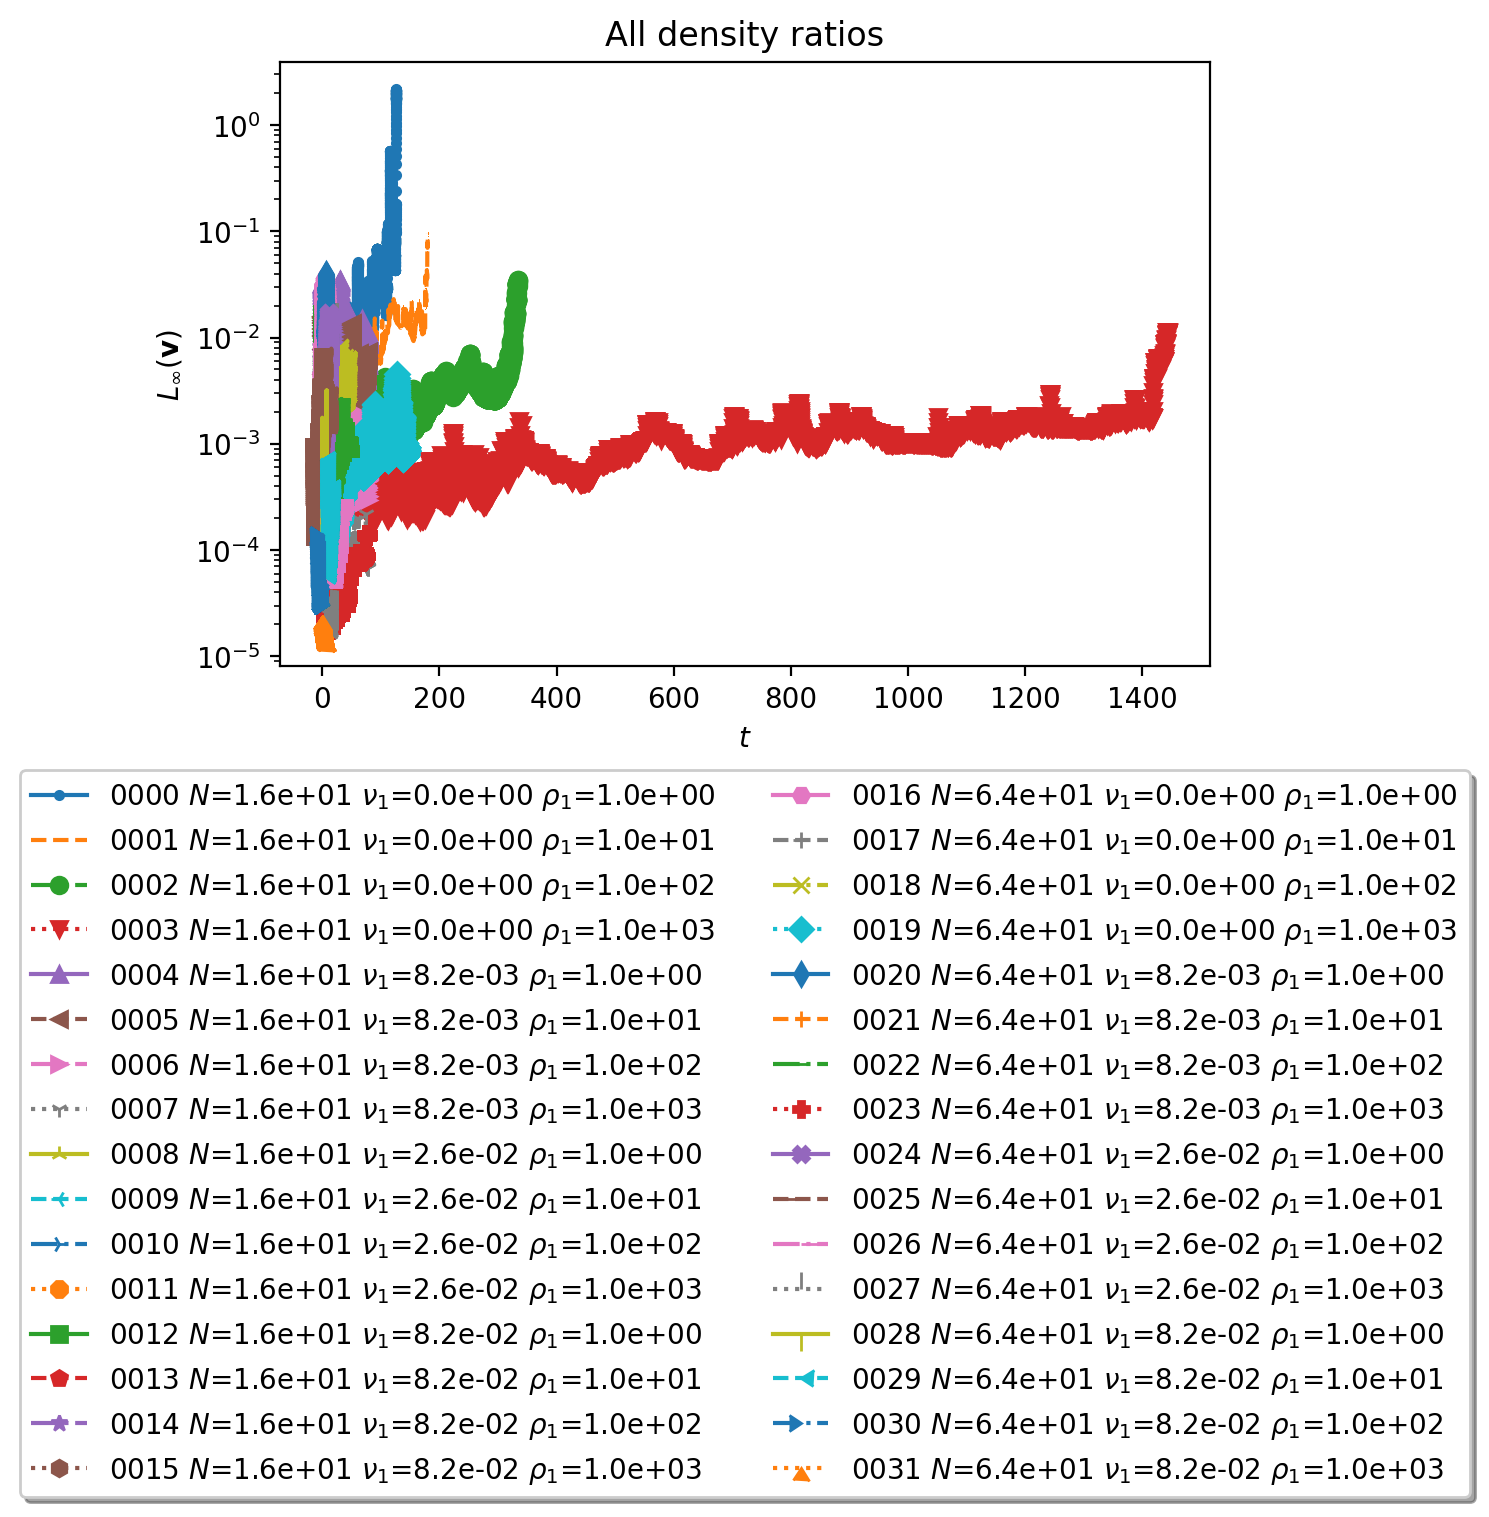

In [14]:
popinet2009_plot("variableDensityRatio/withRhoEquation/noMomentumPredictor/limitedLinearV0/")

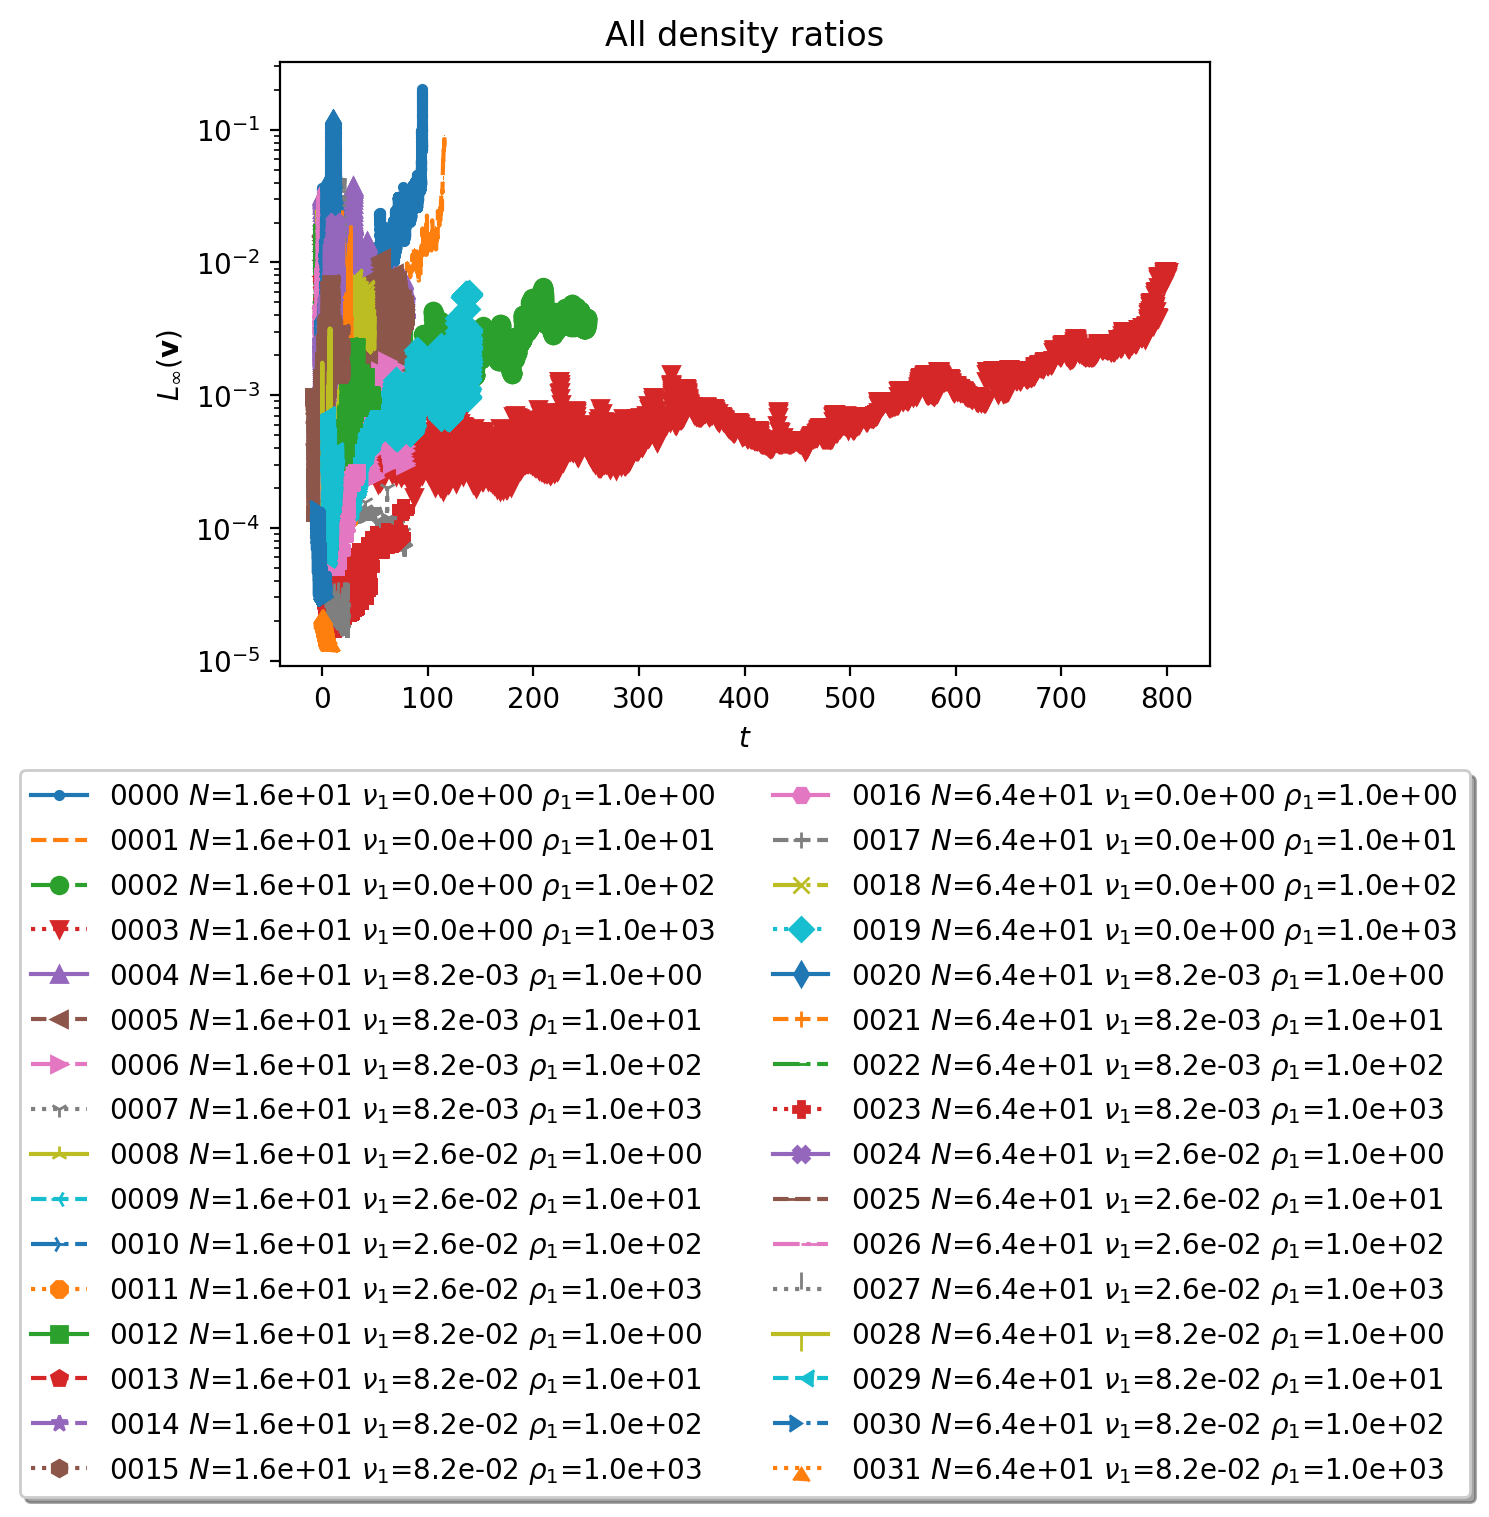

In [15]:
popinet2009_plot("variableDensityRatio/noRhoEquation/noMomentumPredictor/limitedLinearV0/")

## Comparsion between new results and results from SAAMPLE

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


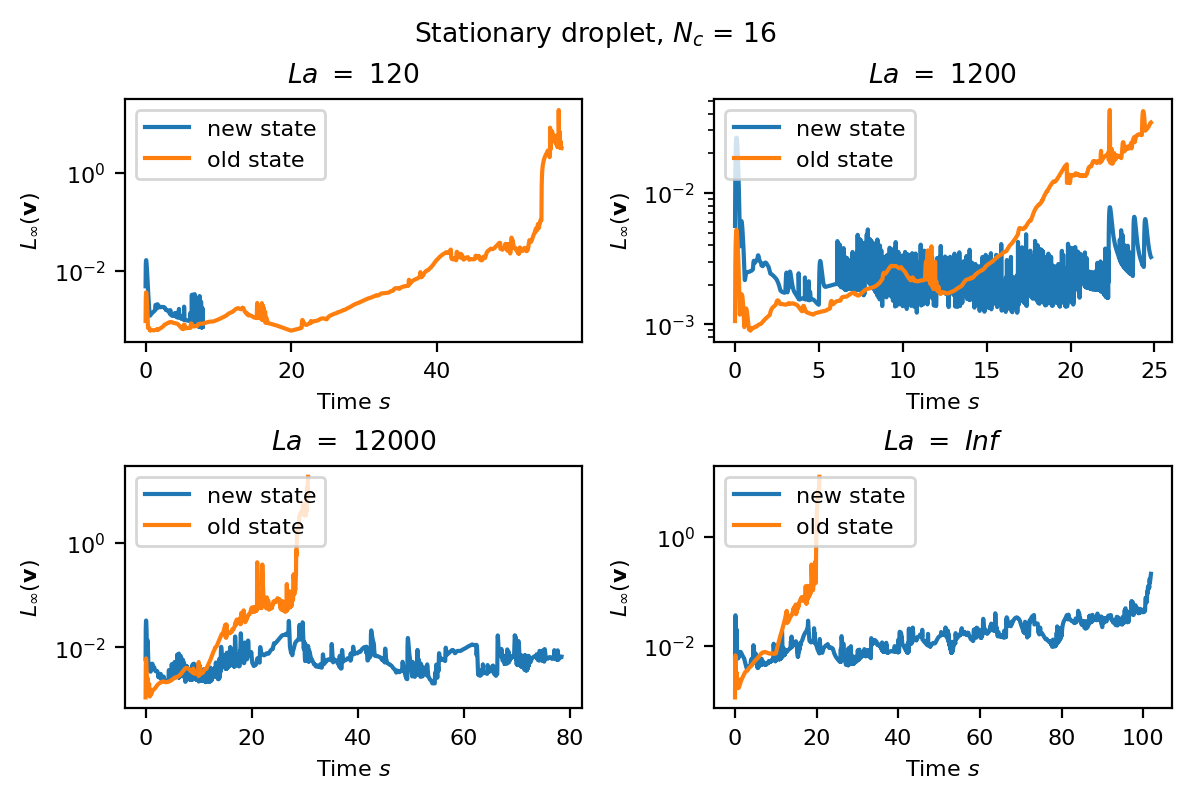

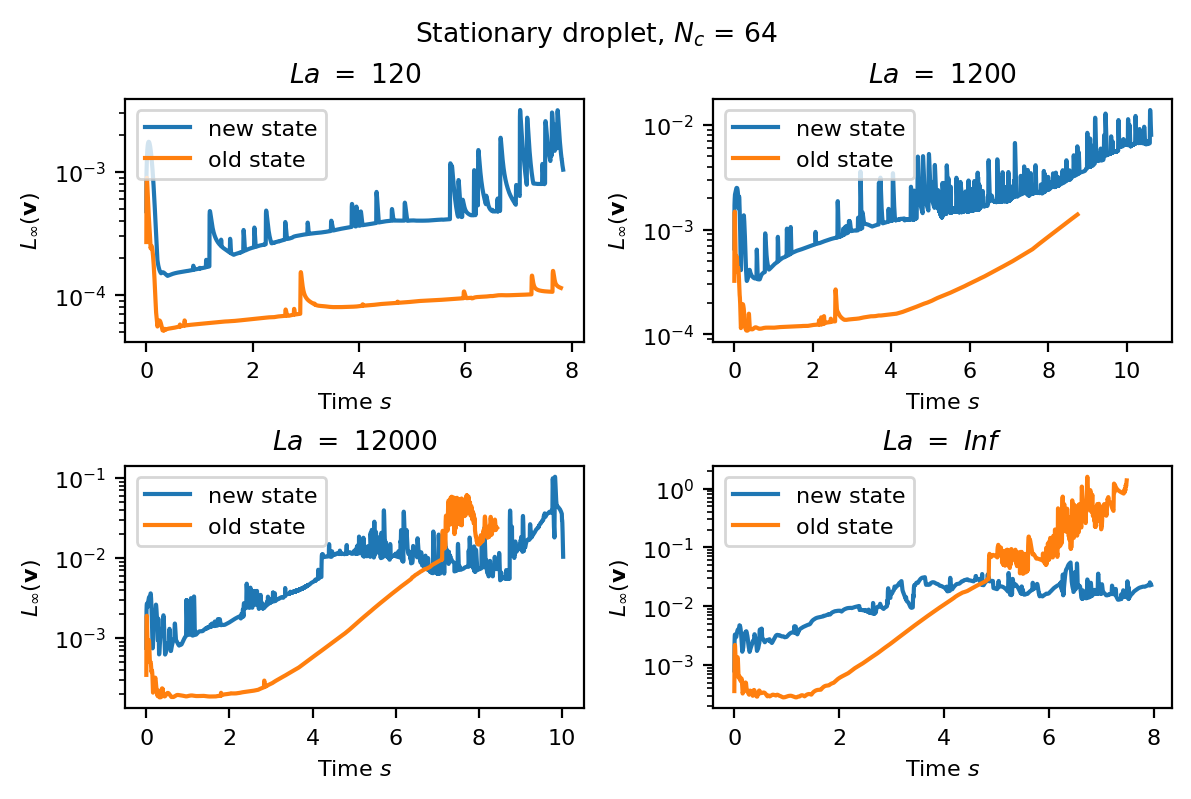

In [16]:
popinet2009_comparsion("variableDensityRatio/withRhoEquation/withMomentumPredictor/limitedLinearV1/")

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


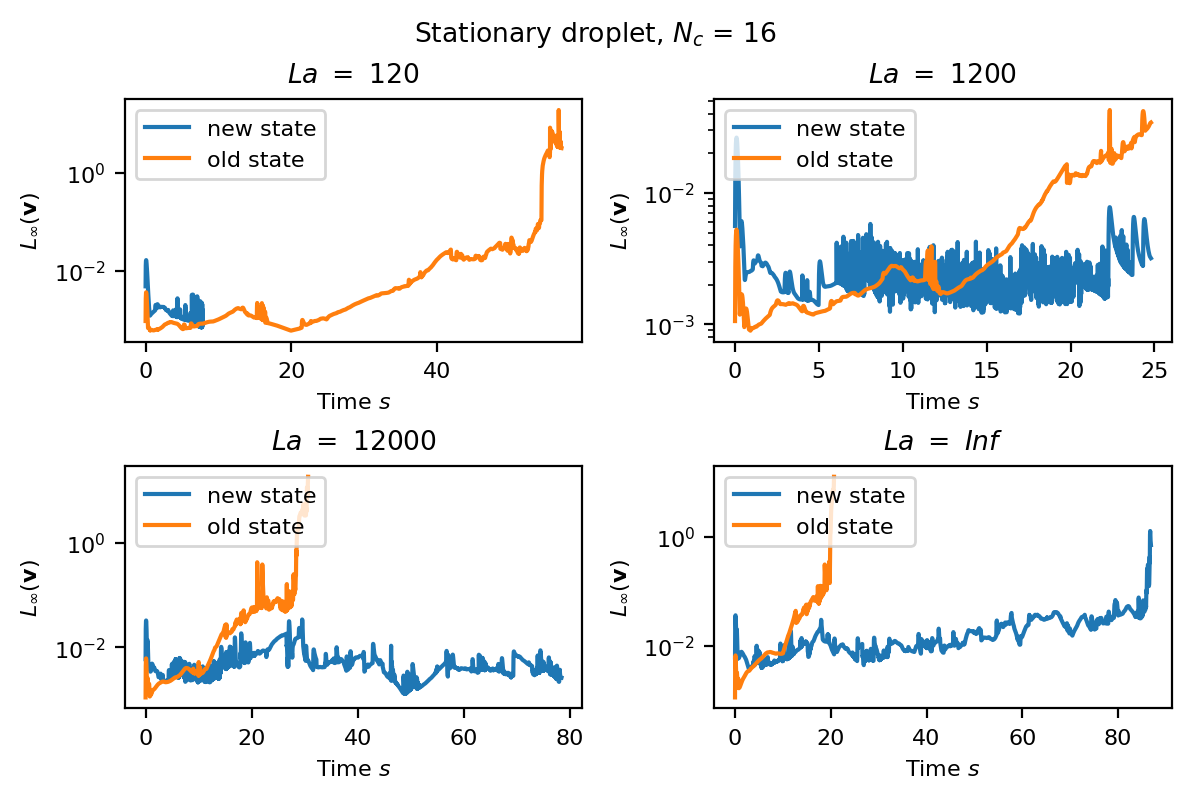

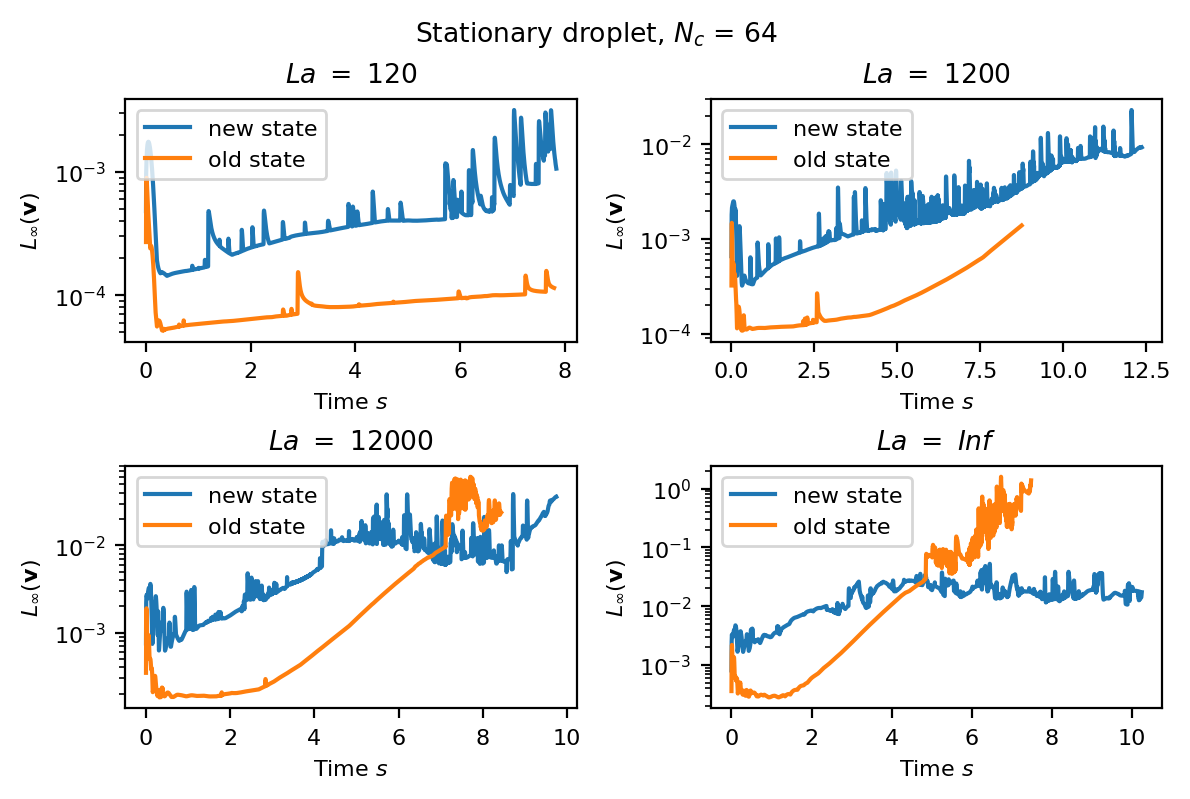

In [17]:
popinet2009_comparsion("variableDensityRatio/noRhoEquation/withMomentumPredictor/limitedLinearV1/")

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


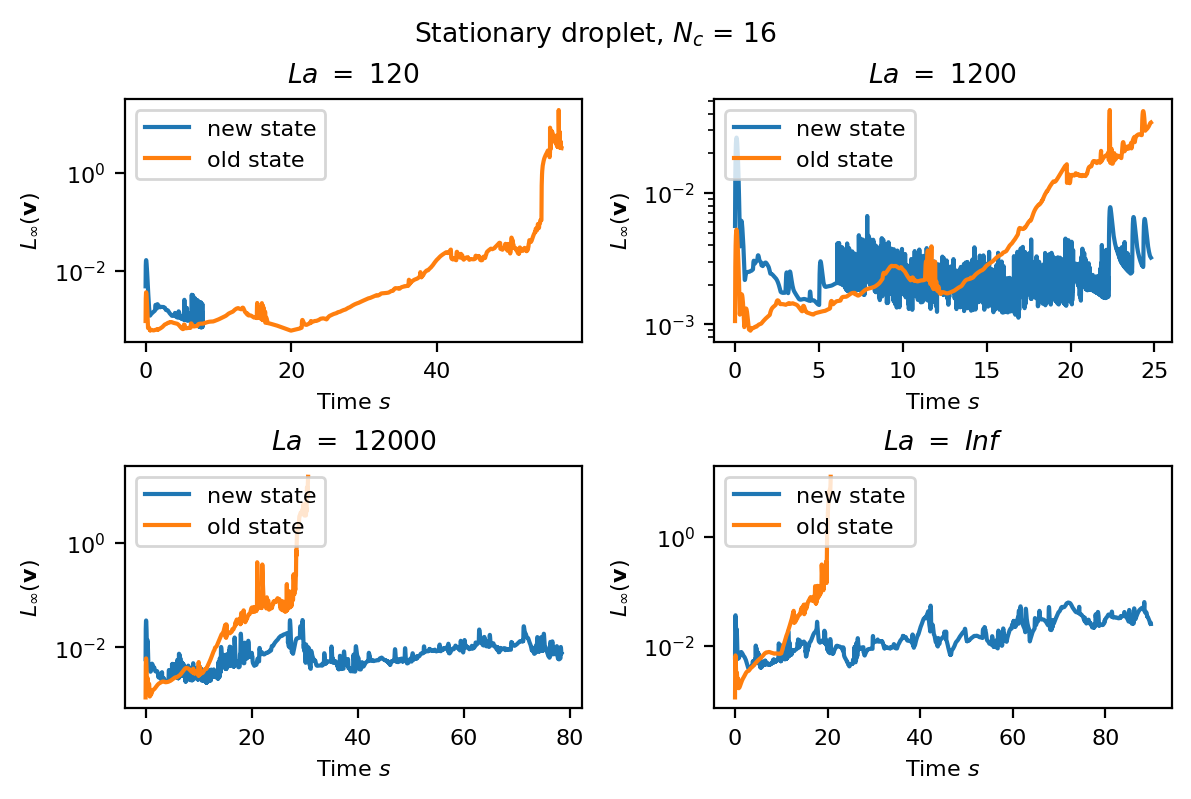

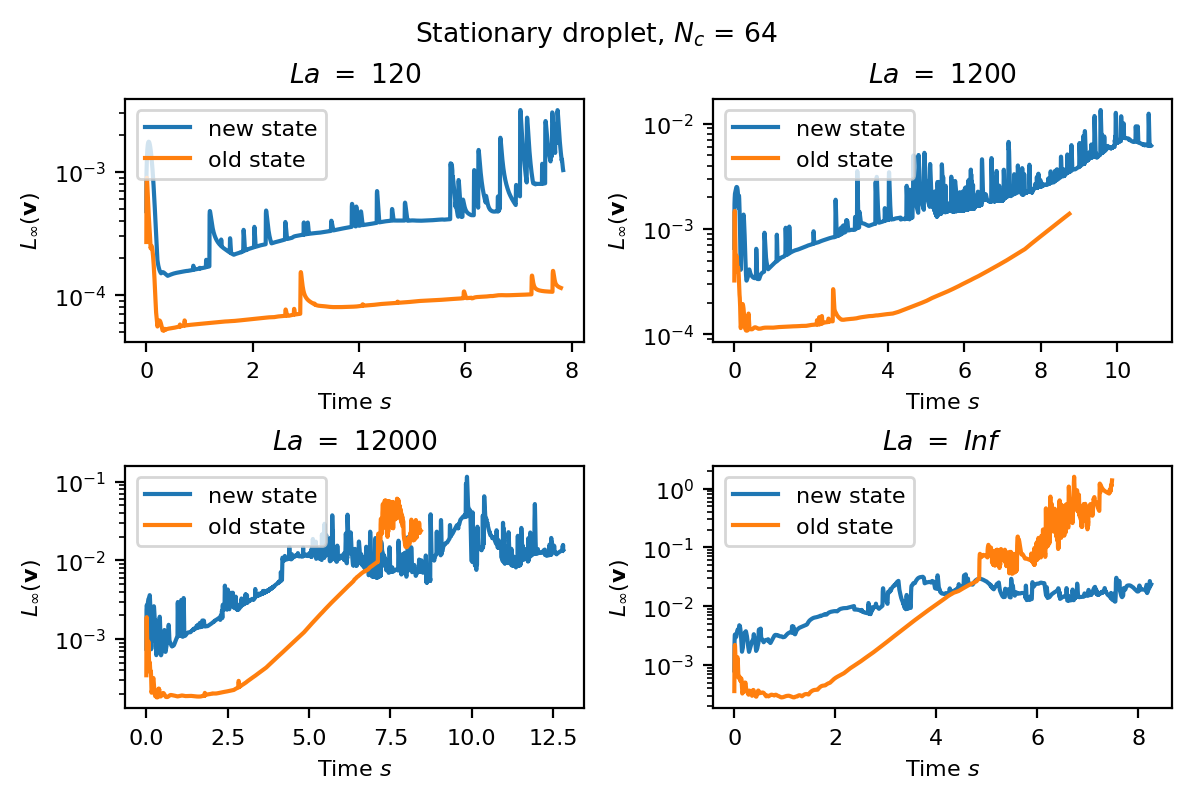

In [18]:
popinet2009_comparsion("variableDensityRatio/withRhoEquation/withMomentumPredictor/limitedLinearV0.5/")

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


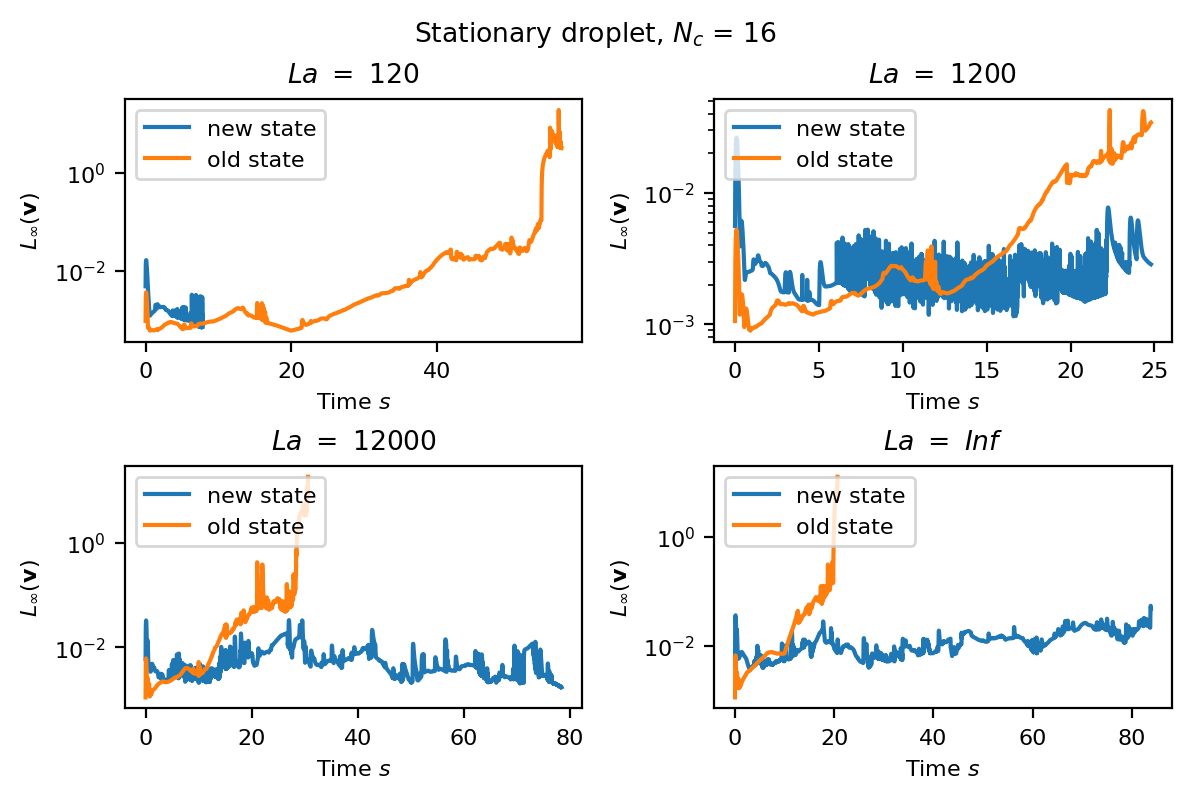

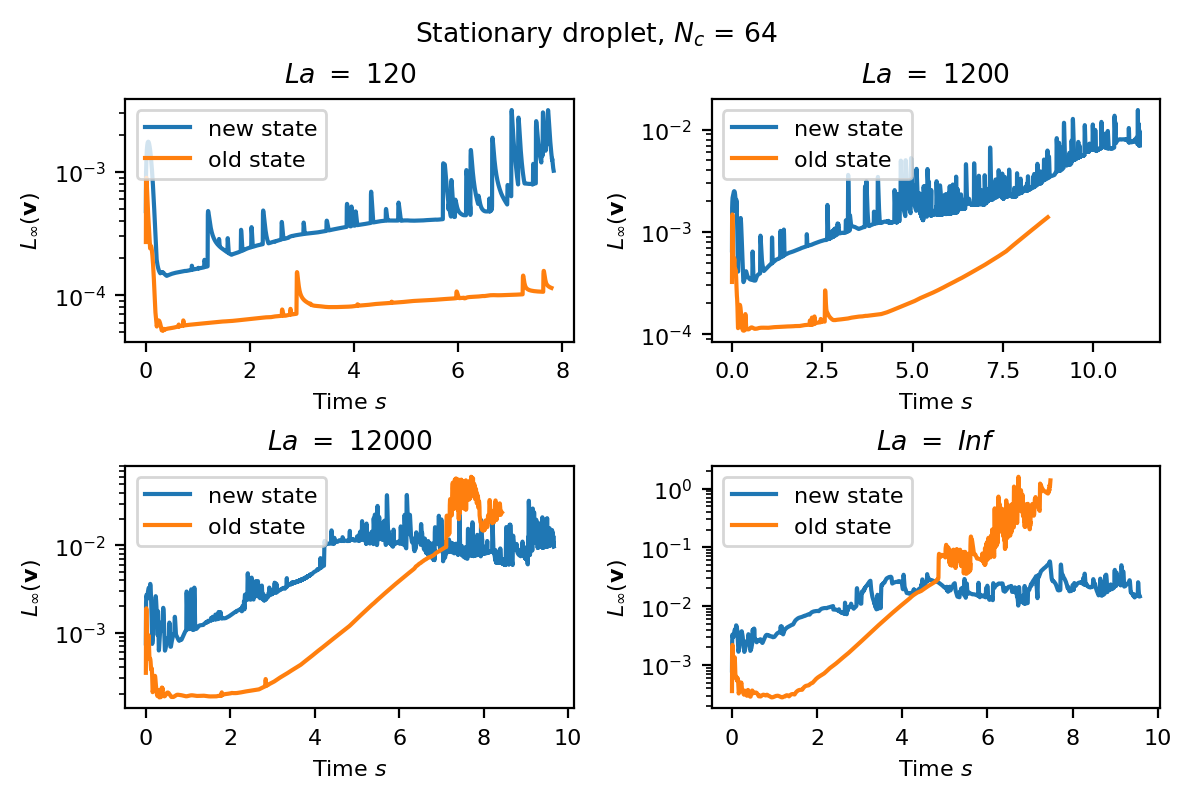

In [19]:
popinet2009_comparsion("variableDensityRatio/noRhoEquation/withMomentumPredictor/limitedLinearV0.5/")

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


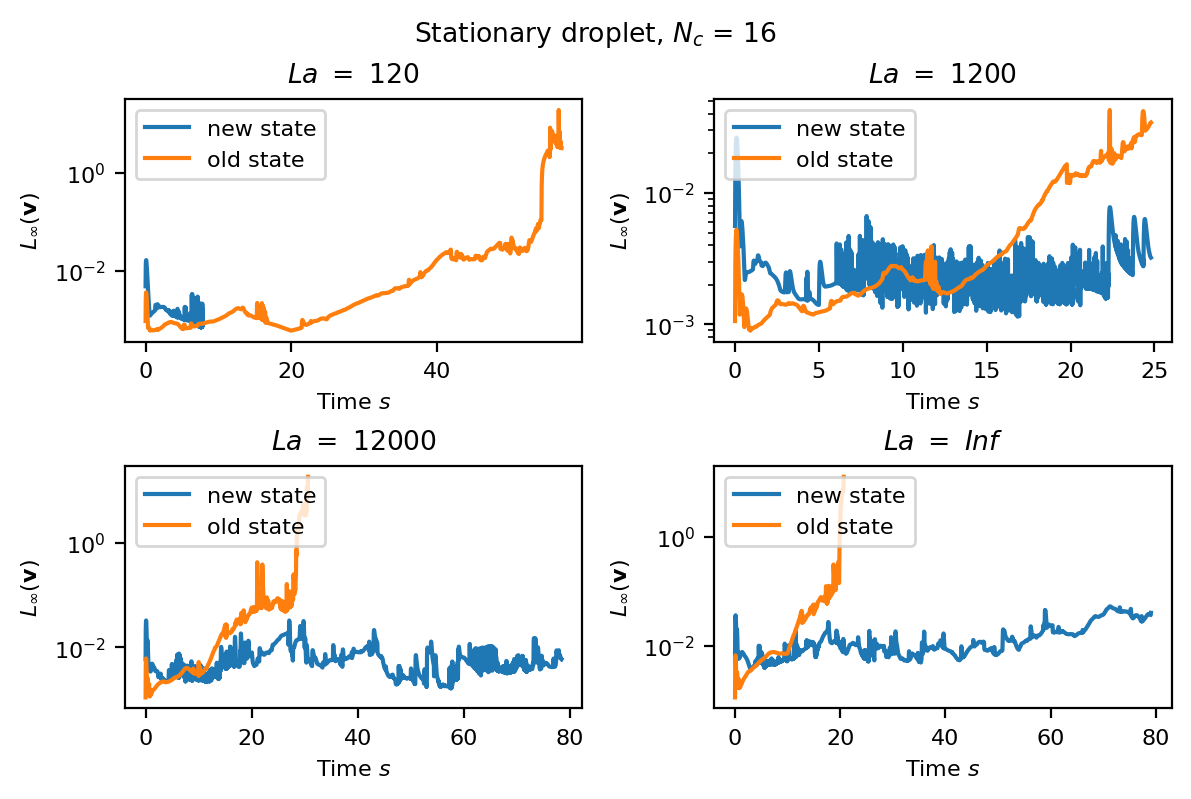

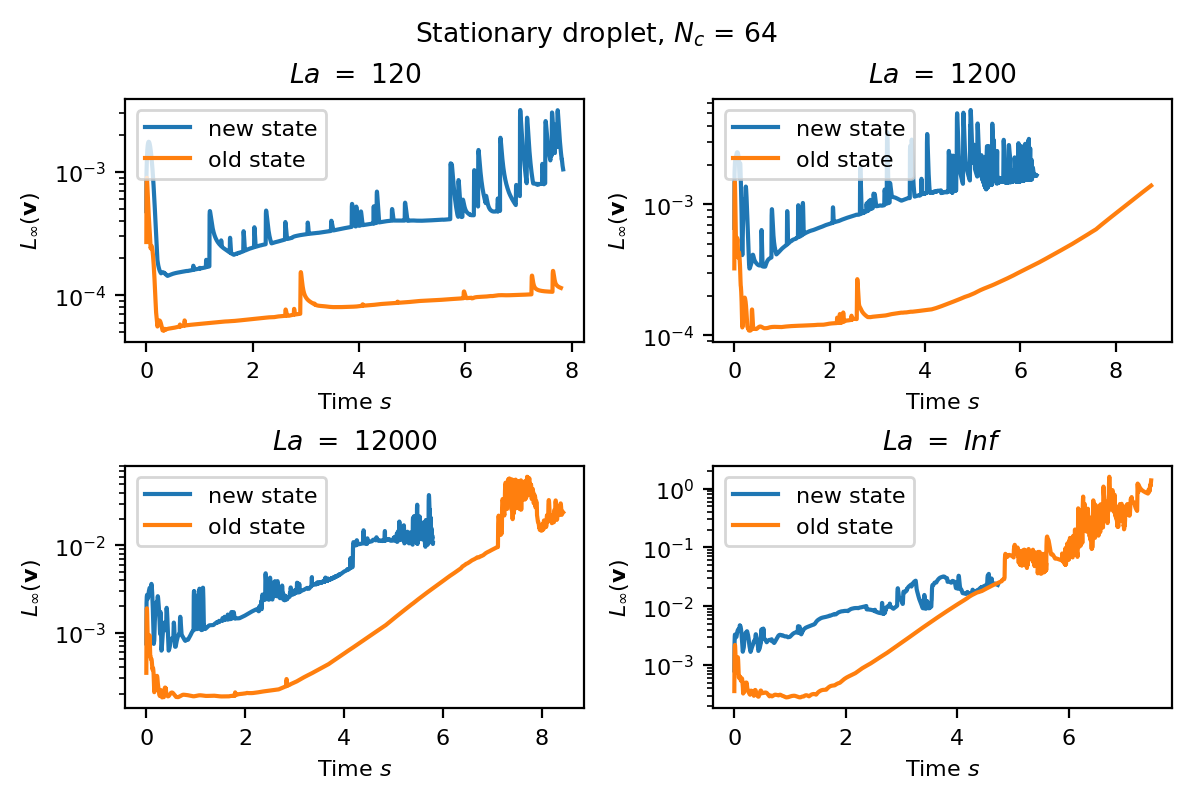

In [20]:
popinet2009_comparsion("variableDensityRatio/withRhoEquation/withMomentumPredictor/limitedLinearV0/")

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


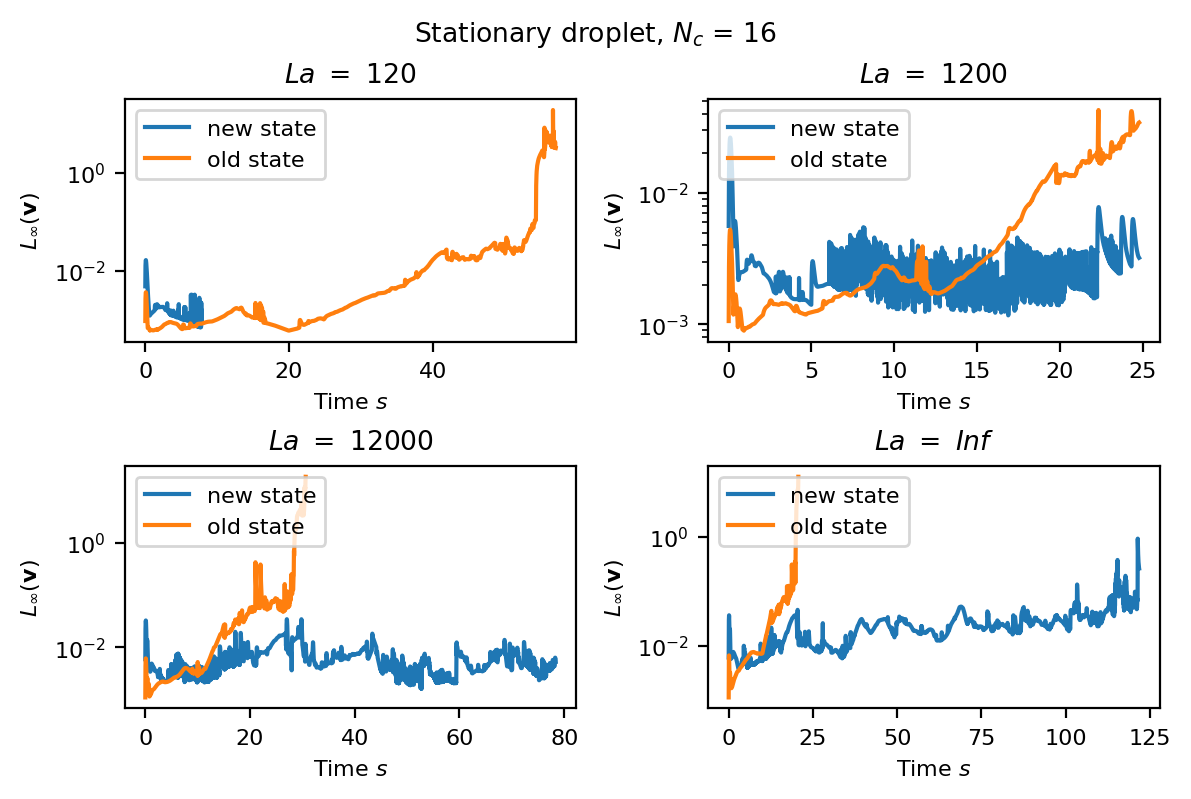

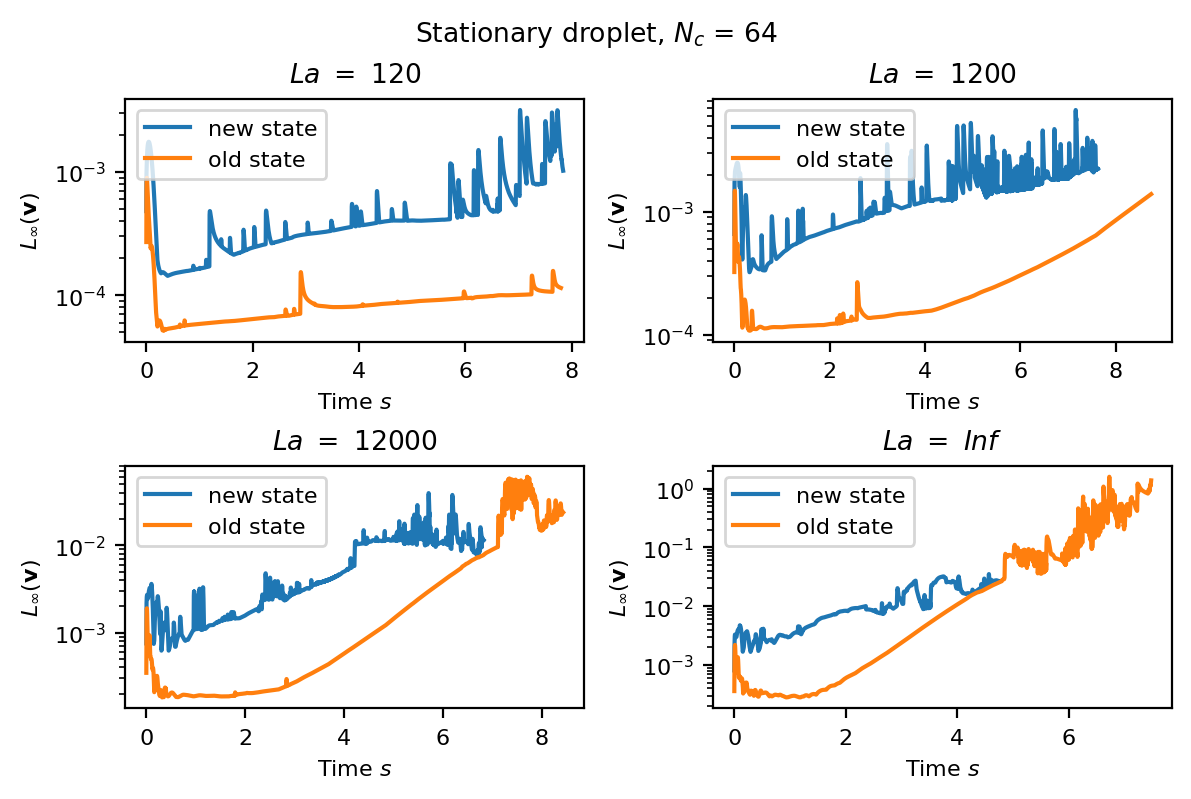

In [21]:
popinet2009_comparsion("variableDensityRatio/noRhoEquation/withMomentumPredictor/limitedLinearV0/")

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


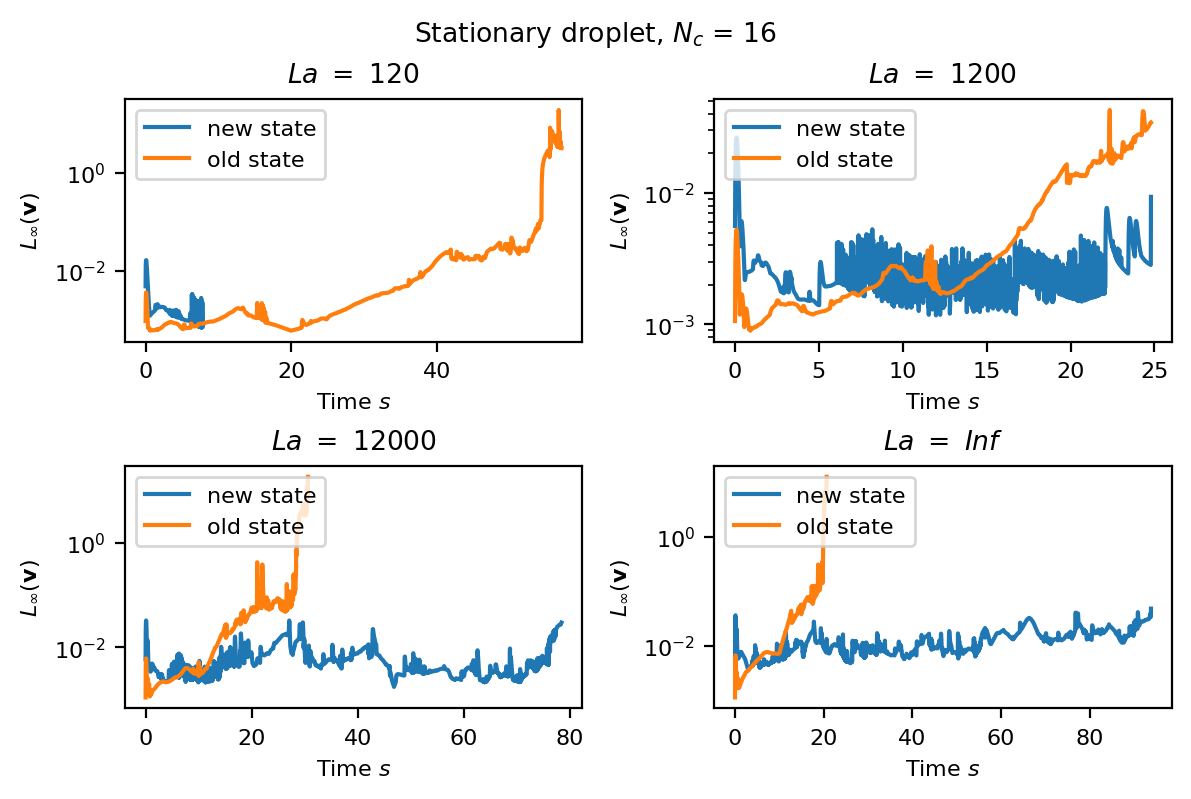

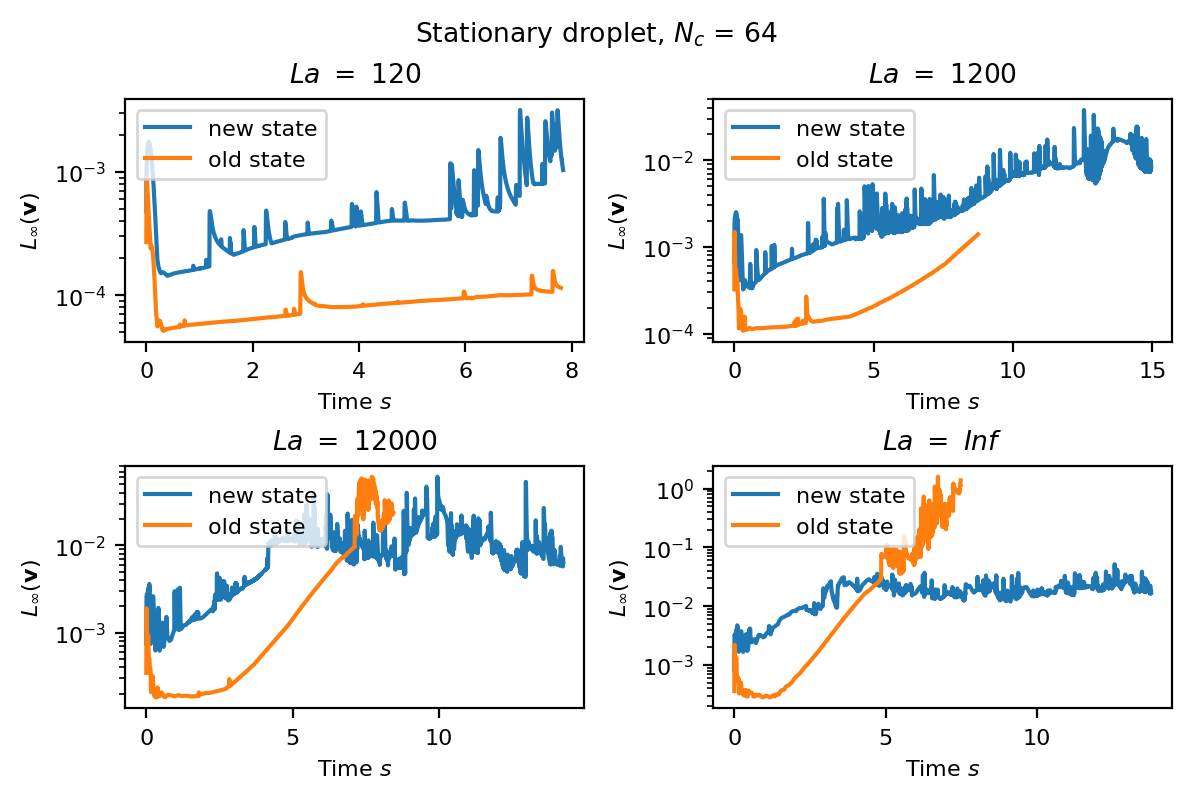

In [22]:
popinet2009_comparsion("variableDensityRatio/withRhoEquation/noMomentumPredictor/limitedLinearV1/")

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


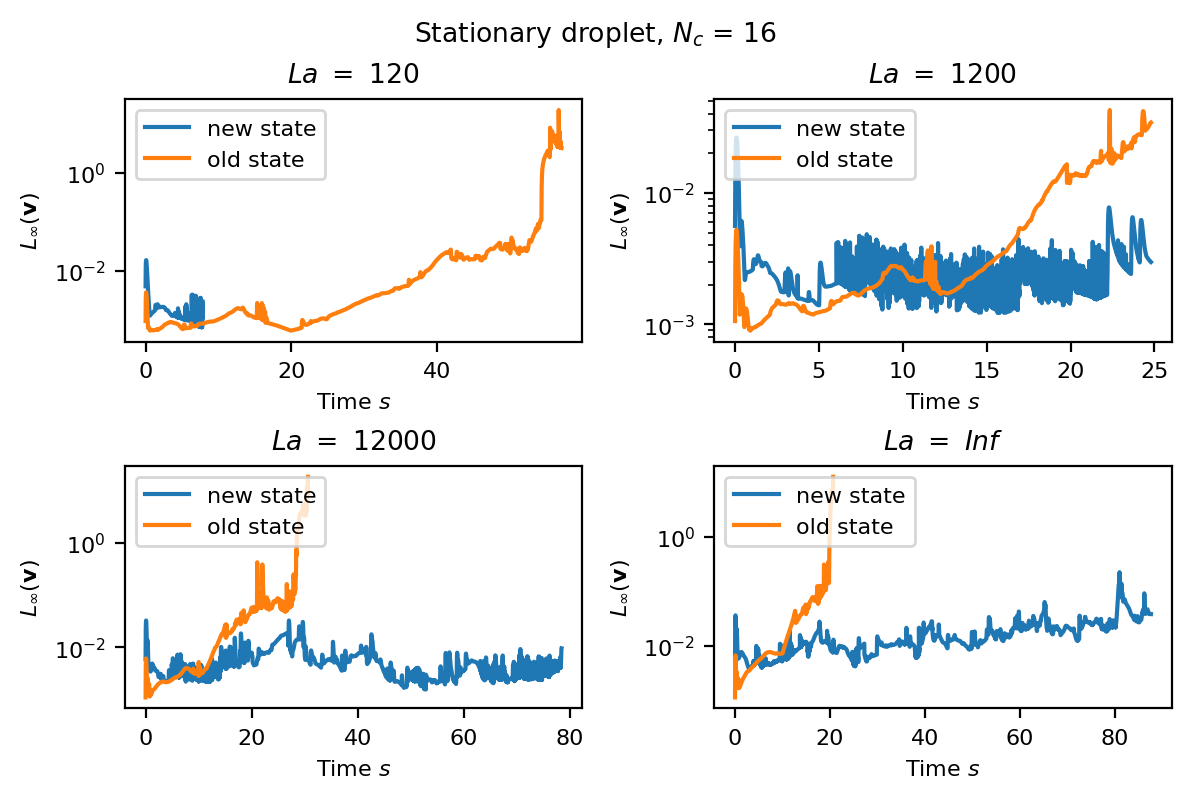

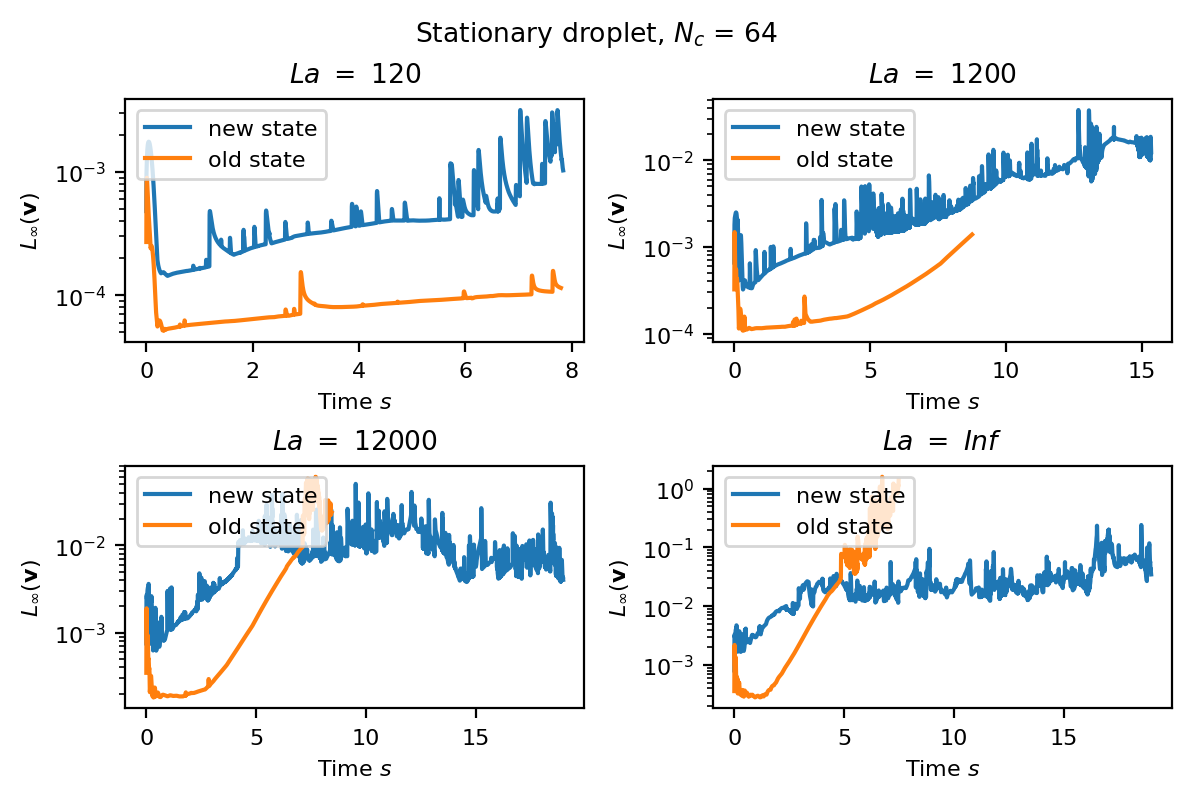

In [23]:
popinet2009_comparsion("variableDensityRatio/noRhoEquation/noMomentumPredictor/limitedLinearV1/")

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


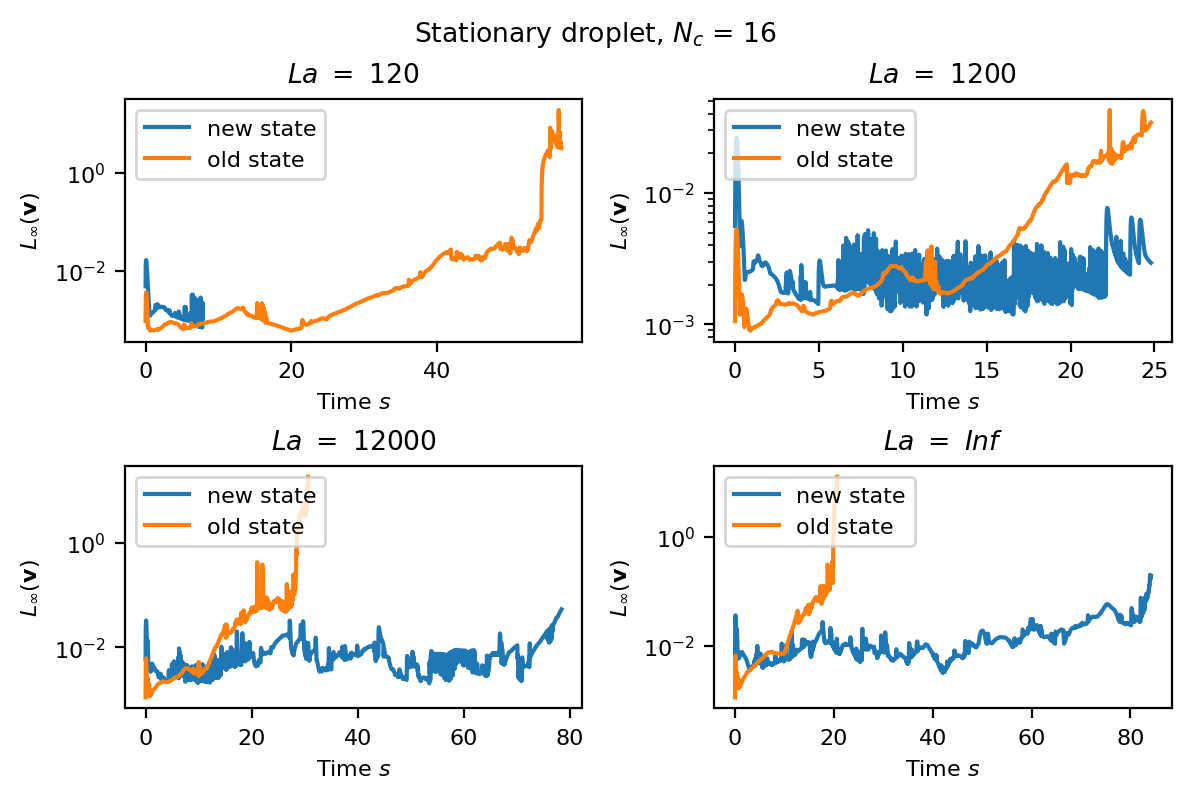

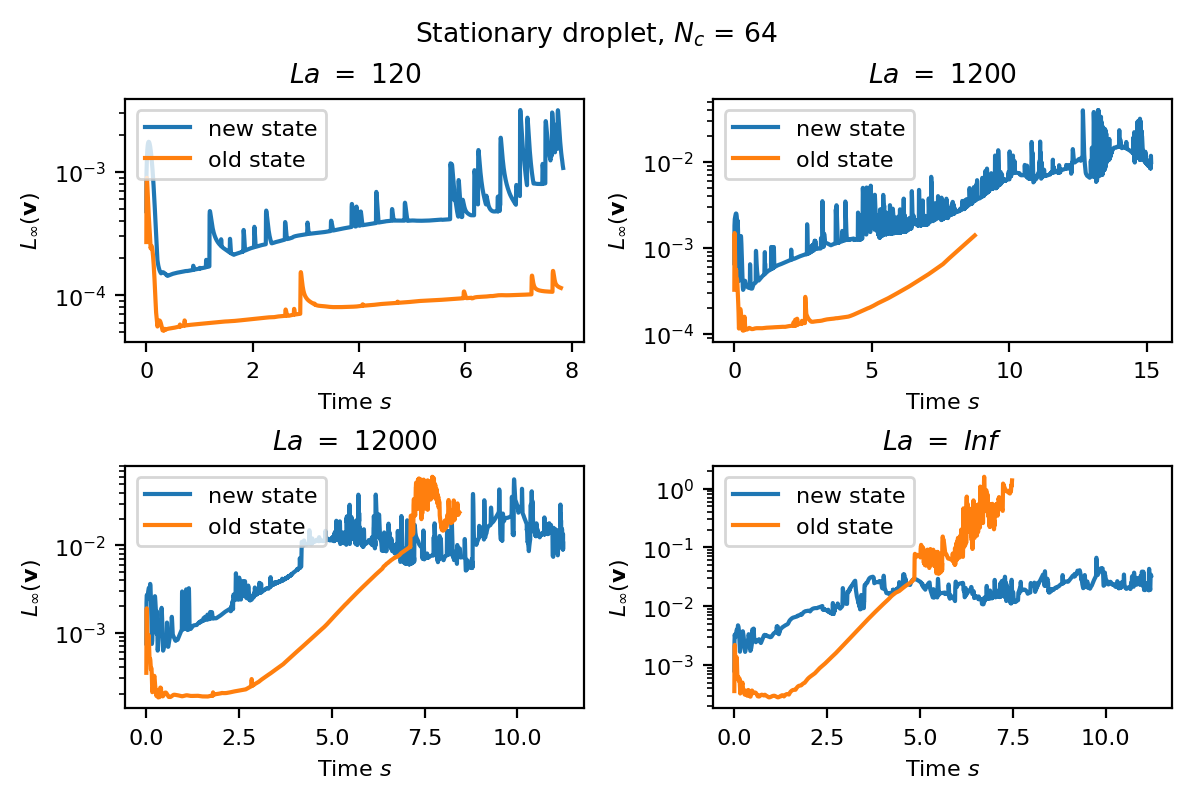

In [24]:
popinet2009_comparsion("variableDensityRatio/withRhoEquation/noMomentumPredictor/limitedLinearV0.5/")

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


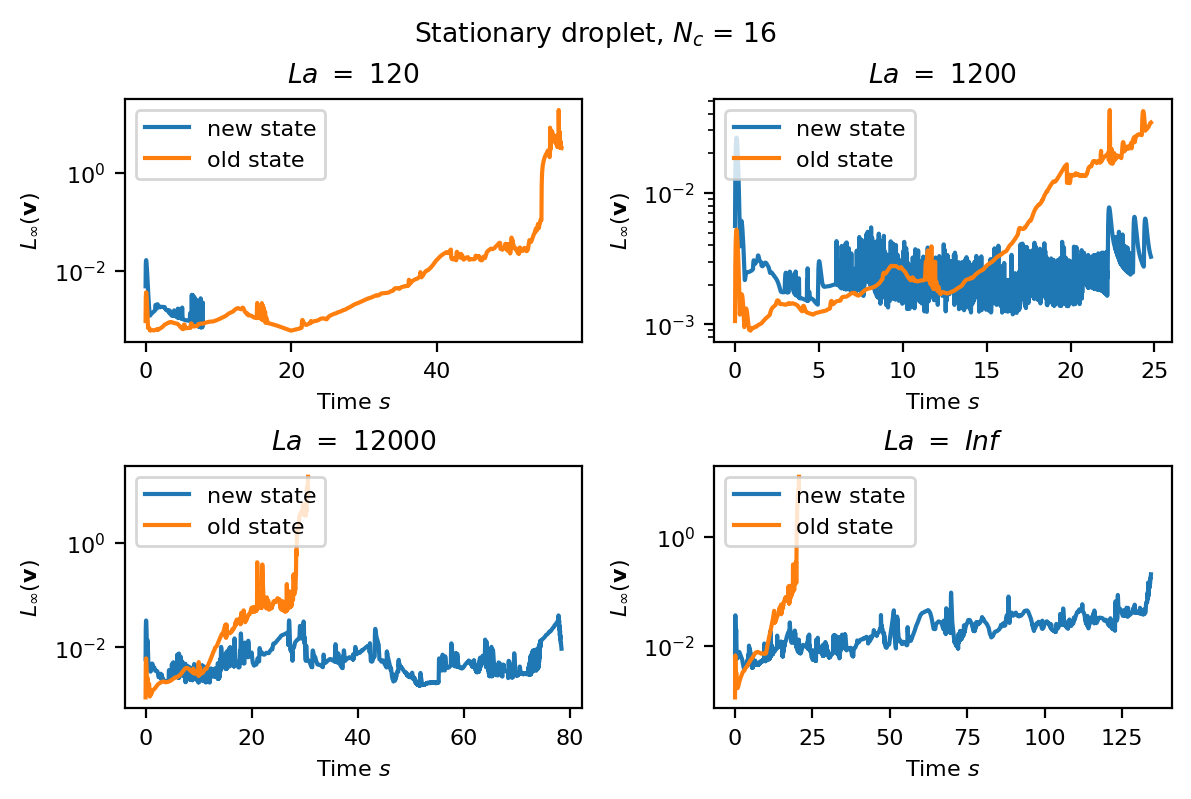

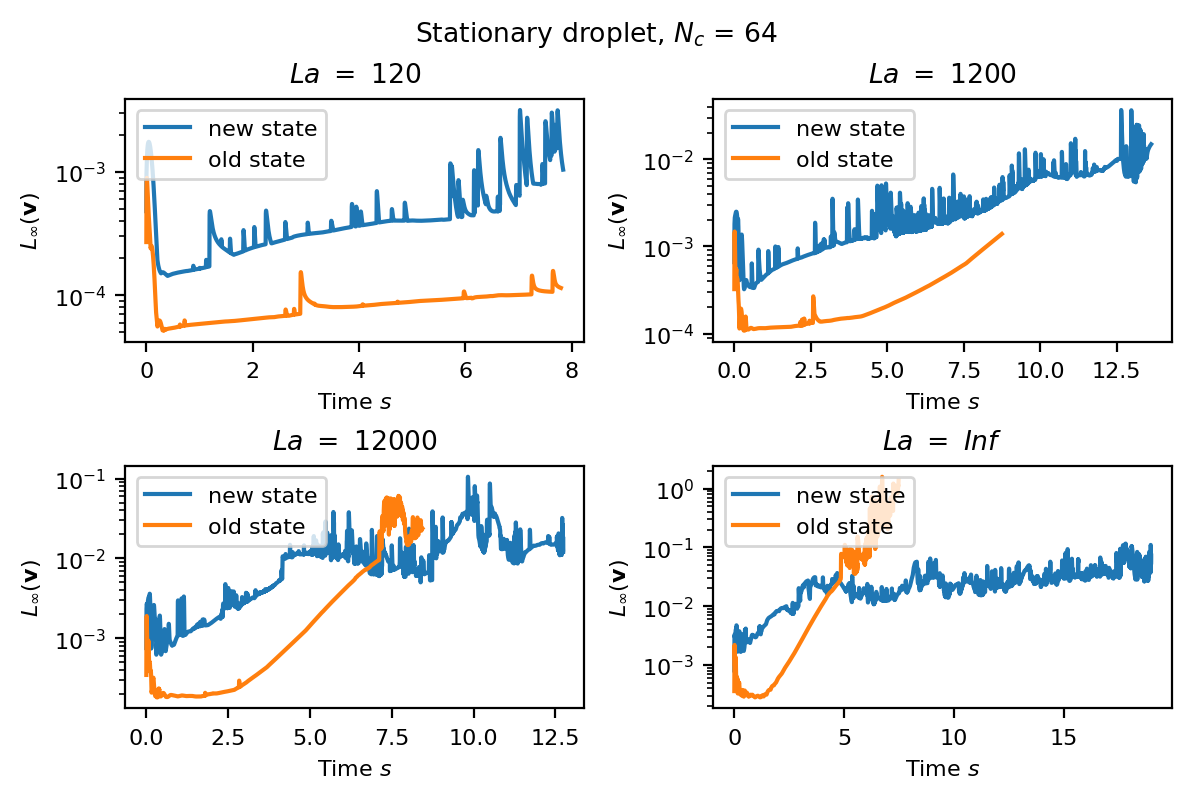

In [25]:
popinet2009_comparsion("variableDensityRatio/noRhoEquation/noMomentumPredictor/limitedLinearV0.5/")

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


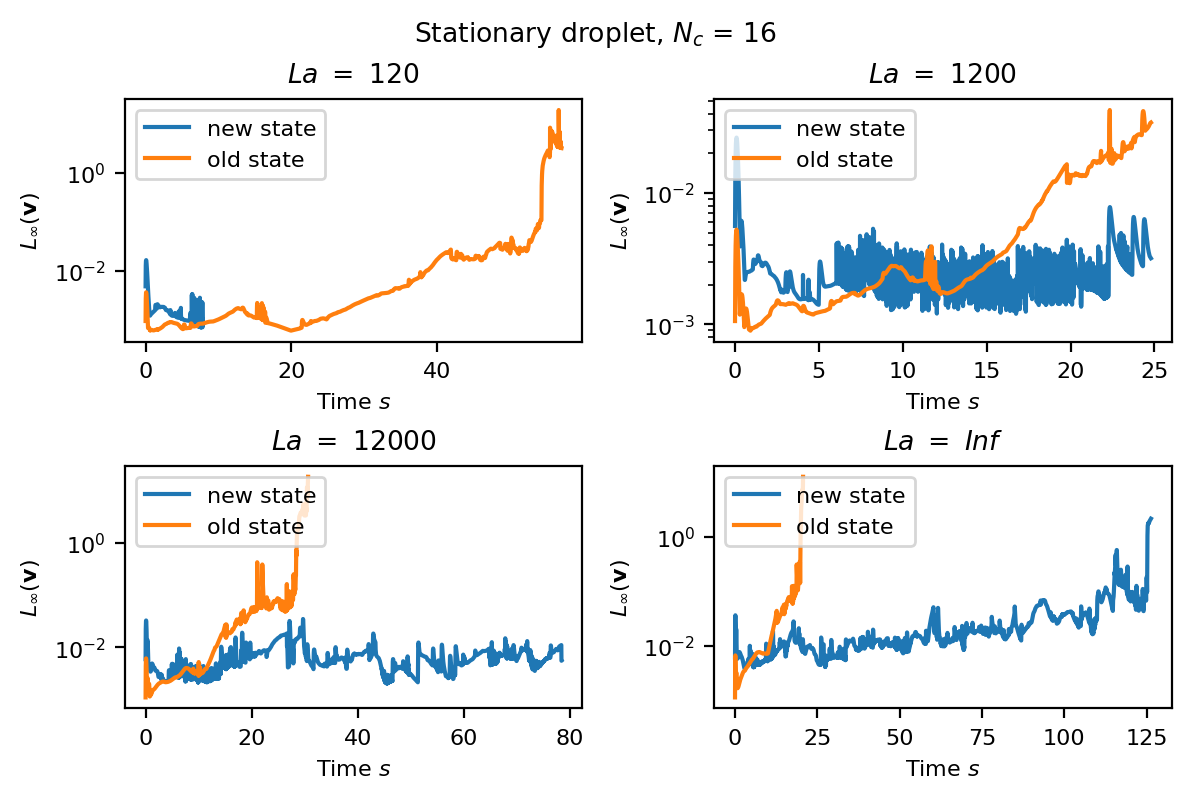

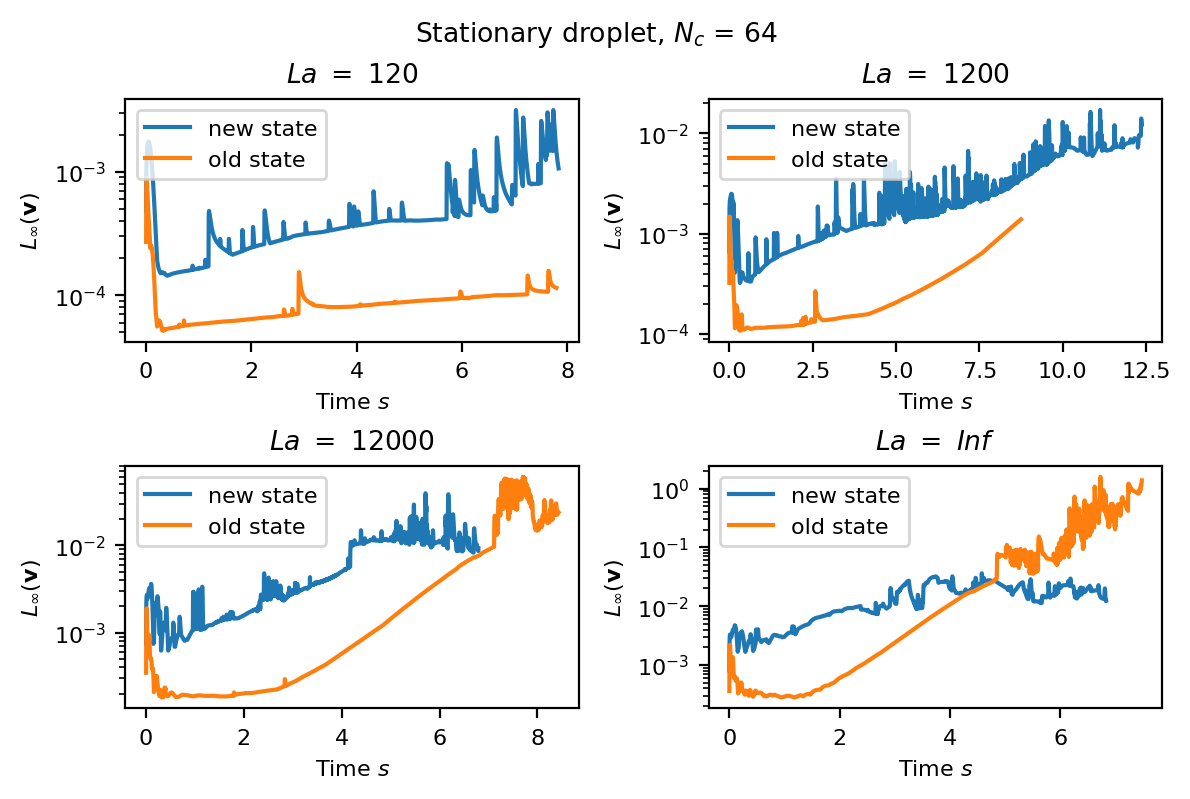

In [26]:
popinet2009_comparsion("variableDensityRatio/withRhoEquation/noMomentumPredictor/limitedLinearV0/")

Resolutions available in the old data set =  [16, 32, 64, 128]
Resolutions available in the new data set =  [16, 64]


/shared/apps/.gcc/9.1/.openmpi/4.0/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Old and new mesh resolutions are not equal, comparing the shorter resolution list!


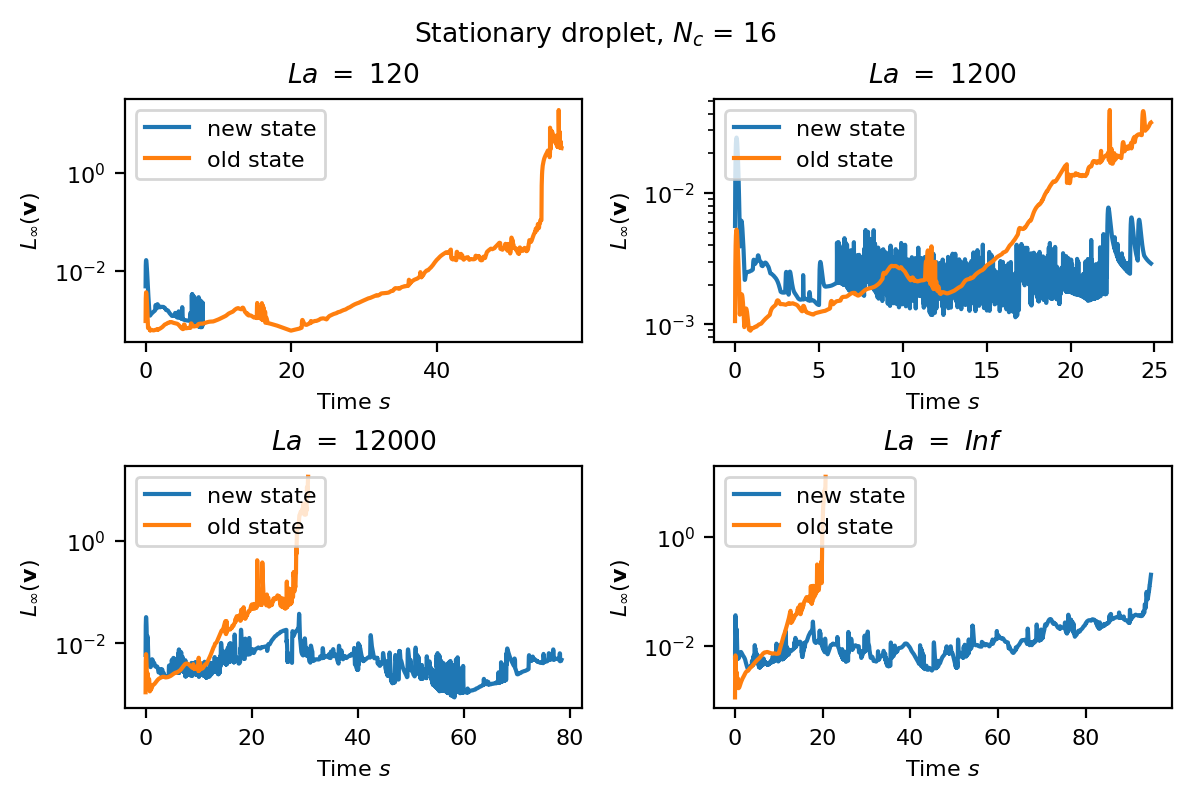

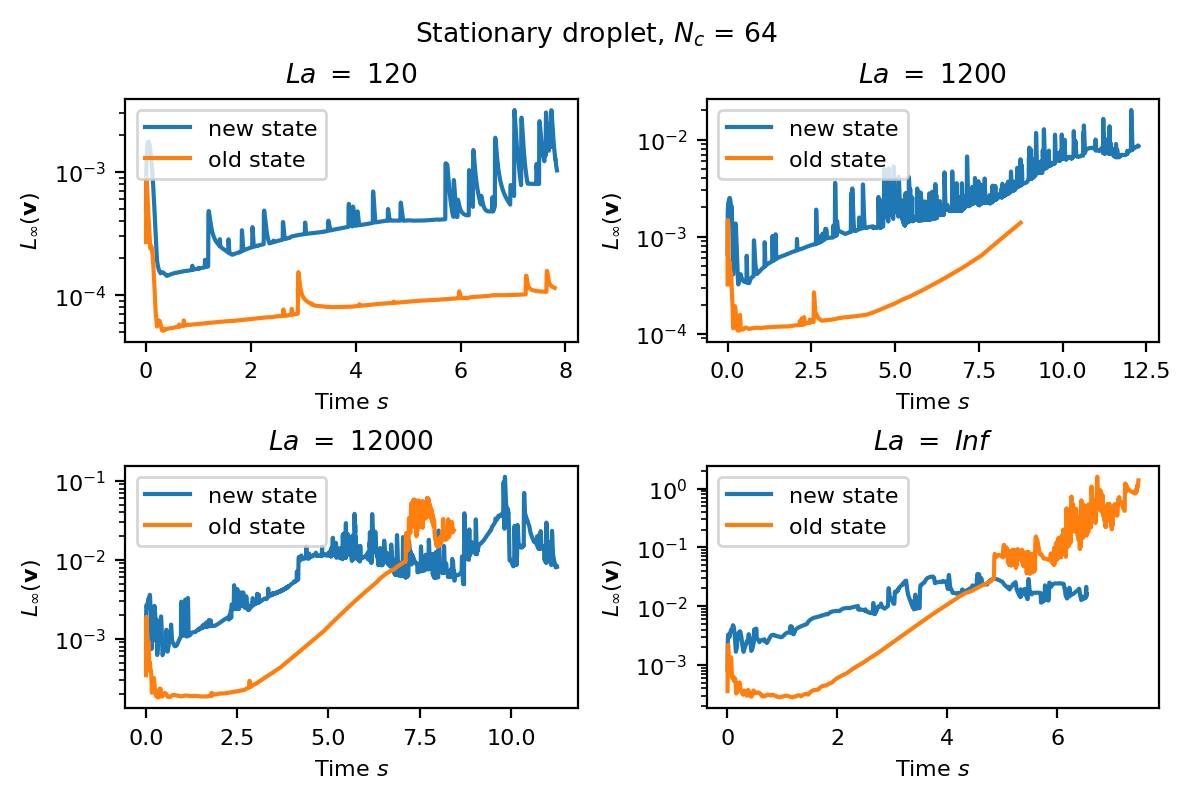

In [27]:
popinet2009_comparsion("variableDensityRatio/noRhoEquation/noMomentumPredictor/limitedLinearV0/")

In [28]:
# rcParams["figure.dpi"] = 200
# idx = pd.IndexSlice
# plot_dframe(popinet_2009_df.loc[idx[[16],:,:,:]],
#             popinet_2009_agglom,
#             title="Stationary droplet $N_c$=16", 
#             plotDict=plotDict)

In [29]:
# rcParams["figure.dpi"] = 200
# plot_dframe(popinet_2009_df.loc[idx[[64],:,:,:]],
#             popinet_2009_agglom,
#             title="Stationary droplet $N_c$=64", 
#             plotDict=plotDict)
#plot_comparison(old_state_df, popinet_2009_df1)
